# Project1: Road Traffic Severity Classification¶
## Objective
## Data


## Loading necessary libraries and datasets
- NumPy: A library for numerical operations in Python.
- Pandas: A powerful library for data manipulation and analysis.
- Matplotlib: A library for creating static, interactive, and animated visualizations in Python.
- Seaborn: A data visualization library based on Matplotlib for making attractive and informative statistical graphics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="dark")
sns.set_palette("dark")


# Suppresssing non-critical warnings to maintain clean and uncluttered output for better readability.
import warnings
warnings.filterwarnings('ignore')

# Display all columns without truncation
pd.set_option('display.max_columns', None)

## Reading in the Dataset

In [2]:
df = pd.read_csv('Datasets\RTA Dataset.csv')

## Exploratory Descriptive Analysis(EDA)

### Basic Data Inspection

In [3]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestri

In [4]:
df.tail()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
12311   Lorry (11?40Q)            Owner                     NaN   
12312       Automobile            Owner                     NaN   
12313            Bajaj            Owner                  2-5yrs   
12314  Lorry (41?100Q)            Owner                  2-5yrs   
12315            Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                 Road_allignment Types_of_Junction  \
12311             Tangent road with flat terrain       No junction   
12312                                Escarpments       No junction   
12313  Tangent road with mountainous terrain and       No junction   
12314  Tangent road with mountainous terrain and       No junction   
12315  Tangent road with mountainous terrain and           O Shape   

      Road_surface_type Road_surface_conditions       Light_conditions  \
12311     Asphalt roads                     Dry               Daylight   
12312     Asphalt roads                     Dry               Daylight   
12313     Asphalt roads                     Dry               Daylight   
12314     Asphalt roads                     Dry  Darkness - lights lit   
12315     Asphalt roads                     Dry  Darkness - lights lit   

      Weather_conditions               Type_of_collision  \
12311             Normal  Vehicle with vehicle collision   
12312             Normal  Vehicle with vehicle collision   
12313             Normal  Vehicle with vehicle collision   
12314             Normal  Vehicle with vehicle collision   
12315             Normal  Vehicle with vehicle collision   

       Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
12311                            2                     1   Going straight   
12312                            2                     1            Other   
12313                            1                     1            Other   
12314                            2                     1            Other   
12315                            2                     1         Stopping   

        Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
12311               na              na                   na                na   
12312               na              na                   na                na   
12313  Driver or rider            Male                31-50                 3   
12314               na              na                   na                na   
12315       Pedestrian          Female       

In [5]:
df.sample(5)

Time Day_of_week Age_band_of_driver Sex_of_driver  \
89    15:17:00      Sunday              31-50          Male   
299   15:40:00      Monday              18-30          Male   
5278   8:42:00      Monday              18-30          Male   
9452   7:02:00   Wednesday              31-50          Male   
4075  18:40:00      Friday              18-30          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
89    Junior high school                Employee             5-10yr   
299   Junior high school                Employee              2-5yr   
5278  Junior high school                   Owner             5-10yr   
9452         High school                Employee              2-5yr   
4075                 NaN                     NaN                NaN   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
89          Automobile            Owner                  2-5yrs   
299              Other     Organization                 5-10yrs   
5278      Stationwagen            Owner                  2-5yrs   
9452  Pick up upto 10Q            Owner                 5-10yrs   
4075    Lorry (11?40Q)            Owner                  2-5yrs   

     Defect_of_vehicle Area_accident_occured  \
89           No defect          Office areas   
299                NaN     Residential areas   
5278               NaN                 Other   
9452         No defect          Church areas   
4075         No defect                 Other   

                                      Lanes_or_Medians  \
89                         Double carriageway (median)   
299   Two-way (divided with broken lines road marking)   
5278                                 Undivided Two way   
9452                                 Undivided Two way   
4075  Two-way (divided with broken lines road marking)   

                                    Road_allignment Types_of_Junction  \
89                   Tangent road with flat terrain       No junction   
299                  Tangent road with flat terrain           Y Shape   
5278      Tangent road with mountainous terrain and       No junction   
9452                 Tangent road with flat terrain       No junction   
4075  Tangent road with mild grade and flat terrain           Y Shape   

     Road_surface_type Road_surface_conditions       Light_conditions  \
89       Asphalt roads                     Dry               Daylight   
299      Asphalt roads                     Dry               Daylight   
5278     Asphalt roads             Wet or damp               Daylight   
9452     Asphalt roads                     Dry               Daylight   
4075     Asphalt roads                     Dry  Darkness - lights lit   

     Weather_conditions                Type_of_collision  \
89               Normal   Vehicle with vehicle collision   
299              Normal  Collision with roadside objects   
5278             Normal   Vehicle with vehicle collision   
9452             Normal   Vehicle with vehicle collision   
4075             Normal   Vehicle with vehicle collision   

      Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
89                              2                     1        Reversing   
299                             4                     1   Going straight   
5278                            2                     1   Going straight   
9452                            2                     1   Going straight   
4075                            2                     4              NaN   

       Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
89    Driver or rider            Male                18-30                 3   
299   Driver or rider          Female                18-30                 3   
5278  Driver or rider            Male                    5                 3   
9452               na              na                   na                na   
4075               na              na                   na         

In [6]:
print(f"Dimensions of dataframe: {df.shape}")

Dimensions of dataframe: (12316, 32)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
int64_columns = [column for column in df.columns if df[column].dtype == 'int64']
result = ",".join(int64_columns)
print(f"Number of Numerical variables: {len(int64_columns)}")
print(f"Numerical Columns: {result}\n")

object_columns = [column for column in df.columns if df[column].dtype == 'object']
result = ",".join(object_columns)
print(f"Number of Categorical variables: {len(object_columns)}")
print(f"Categorical Columns: {result}")

Number of Numerical variables: 2
Numerical Columns: Number_of_vehicles_involved,Number_of_casualties

Number of Categorical variables: 30
Categorical Columns: Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


### Descriptive statistics

In [9]:
df.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [10]:
df.describe(include='object')

Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
count            11366            11834                    8388   
unique              17                4                       6   
top         Automobile            Owner                 Unknown   
freq              3205            10459                    2883   

       Defect_of_vehicle Area_accident_occured  \
count               7889                 12077   
unique                 3                    14   
top            No defect                 Other   
freq                7777                  3819   

                                        Lanes_or_Medians  \
count                                              11931   
unique                                                 7   
top     Two-way (divided with broken lines road marking)   
freq                                                4411   

                       Road_allignment Types_of_Junction Road_surface_type  \
count                            12174             11429             12144   
unique                               9                 8                 5   
top     Tangent road with flat terrain           Y Shape     Asphalt roads   
freq                             10459              4543             11296   

       Road_surface_conditions Light_conditions Weather_conditions  \
count                    12316            12316              12316   
unique                       4                4                  9   
top                        Dry         Daylight             Normal   
freq                      9340             8798              10063   

                     Type_of_collision Vehicle_movement   Casualty_class  \
count                            12161            12008            12316   
unique                              10               13                4   
top     Vehicle with vehicle collision   Going straight  Driver or rider   
freq                              8774             8158             4944   

       Sex_of_casualty Age_band_of_casualty Casualty_severity  \
count            12316                12316             12316   
unique               3                    6                 4   
top               Male                   na                 3   
freq              5253                 4443              7076   

       Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
count               9118                 9681               12316   
unique                 7                    5                   9   
top               Driver               Normal    Not a Pedestrian   
freq                5903                 9608               11390   

       Cause_of_accident Accident_severity  
count              12316             12316  
unique                20                 3  
top        No distancing     Slight Injury  
freq                2263             10415

### Exploring Target Variable

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity', ylabel='count'>

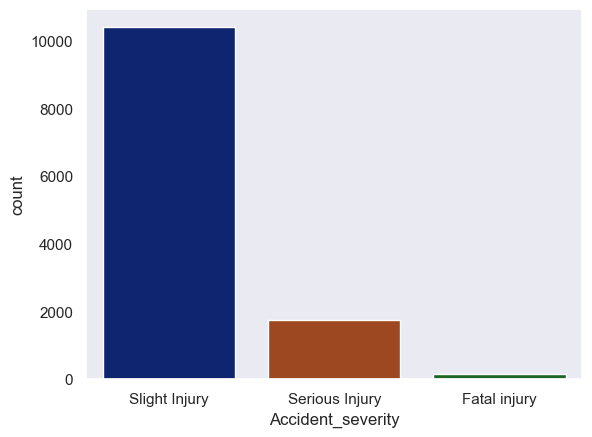

In [11]:
print(df['Accident_severity'].value_counts())
sns.countplot(data=df, x='Accident_severity')

Shows that the dataset is **Unbalanced**

### Duplicate Values

In [12]:
df.duplicated().sum()

0

### Missing Values

In [13]:
# Function prints the number of missing value and percentage of missing values for each column having atleast one missing value
def missing_values_table(df):
        
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 32 columns.
There are 16 columns that have missing values.


Missing Values  % of Total Values
Defect_of_vehicle                  4427               35.9
Service_year_of_vehicle            3928               31.9
Work_of_casuality                  3198               26.0
Fitness_of_casuality               2635               21.4
Type_of_vehicle                     950                7.7
Types_of_Junction                   887                7.2
Driving_experience                  829                6.7
Educational_level                   741                6.0
Vehicle_driver_relation             579                4.7
Owner_of_vehicle                    482                3.9
Lanes_or_Medians                    385                3.1
Vehicle_movement                    308                2.5
Area_accident_occured               239                1.9
Road_surface_type                   172                1.4
Type_of_collision                   155                1.3
Road_allignment                     142                1.2

### Unique Values

In [14]:
df.nunique()

Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [15]:
# Function to print unique values in DataFrame columns with at most max_unique_values unique values.
def unique_values_per_column(dataframe, max_unique_values):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        
        if len(unique_values) <= max_unique_values:
            print(f"Column: {column}")
            print(f"Number of Unique values: {len(unique_values)}")
            print(f"Unique values: {', '.join(map(str, unique_values))}\n")
            
unique_values_per_column(df,20)

Column: Day_of_week
Number of Unique values: 7
Unique values: Monday, Sunday, Friday, Wednesday, Saturday, Thursday, Tuesday

Column: Age_band_of_driver
Number of Unique values: 5
Unique values: 18-30, 31-50, Under 18, Over 51, Unknown

Column: Sex_of_driver
Number of Unique values: 3
Unique values: Male, Female, Unknown

Column: Educational_level
Number of Unique values: 8
Unique values: Above high school, Junior high school, nan, Elementary school, High school, Unknown, Illiterate, Writing & reading

Column: Vehicle_driver_relation
Number of Unique values: 5
Unique values: Employee, Unknown, Owner, nan, Other

Column: Driving_experience
Number of Unique values: 8
Unique values: 1-2yr, Above 10yr, 5-10yr, 2-5yr, nan, No Licence, Below 1yr, unknown

Column: Type_of_vehicle
Number of Unique values: 18
Unique values: Automobile, Public (> 45 seats), Lorry (41?100Q), nan, Public (13?45 seats), Lorry (11?40Q), Long lorry, Public (12 seats), Taxi, Pick up upto 10Q, Stationwagen, Ridden hors

- Column: Fitness_of_casuality has one category as NormalNormal which is same as Normal
- In many columns, we can see a values like 'na','Unknown' and 'unknown' 


In [16]:
def unique_value_with_count(dataframe):
    for column in dataframe.columns:
        print(dataframe[column].value_counts().sort_values(ascending=False))
        print("\n")

unique_value_with_count(df)

Time
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
10:59:00      1
21:36:00      1
16:27:00      1
23:03:00      1
2:47:00       1
Name: count, Length: 1074, dtype: int64


Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64


Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64


Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64


Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64


Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64


Driving_experience
5-10yr      

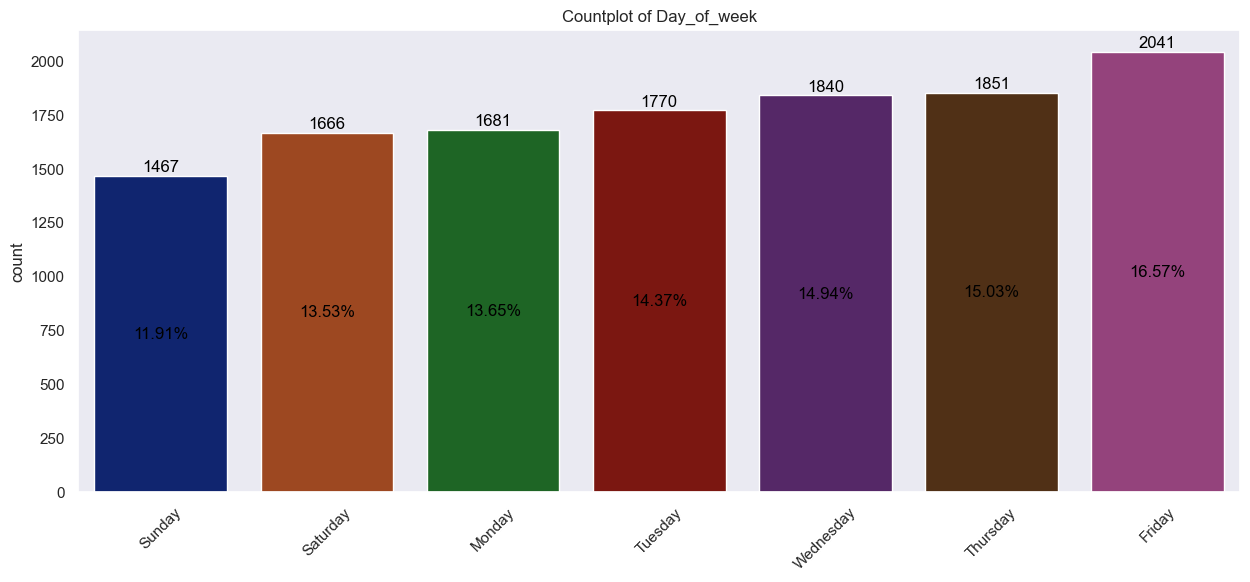

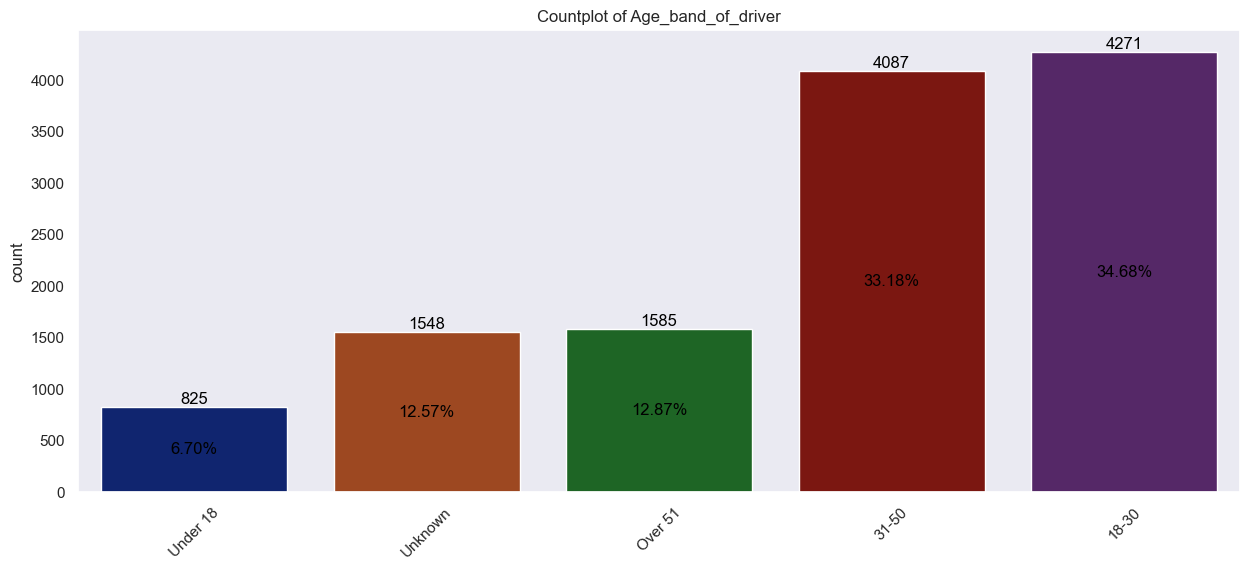

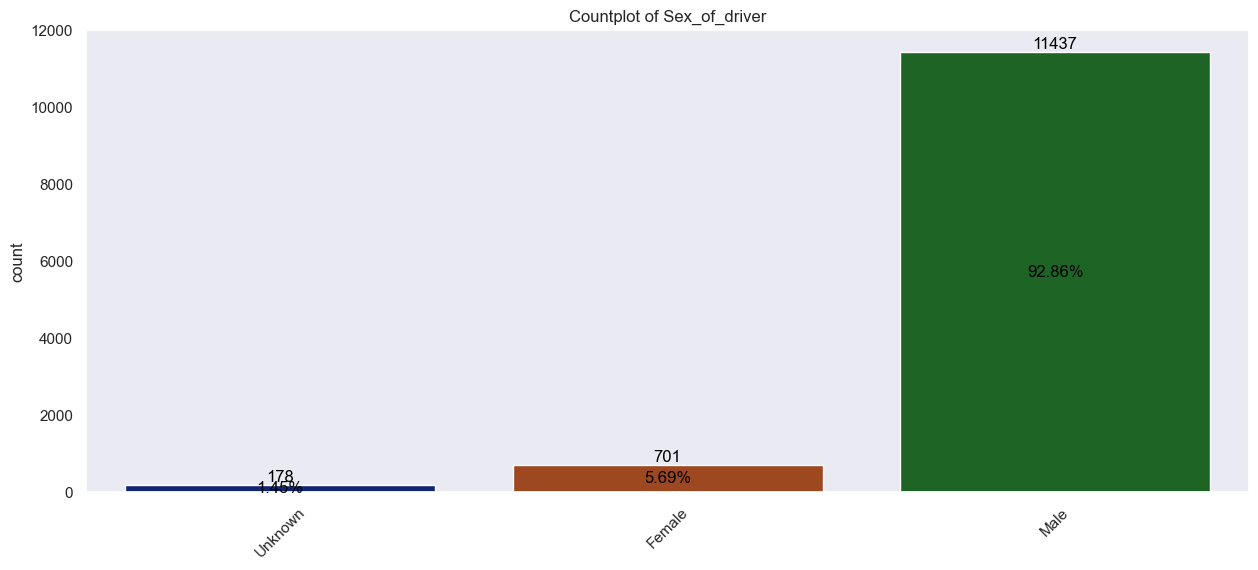

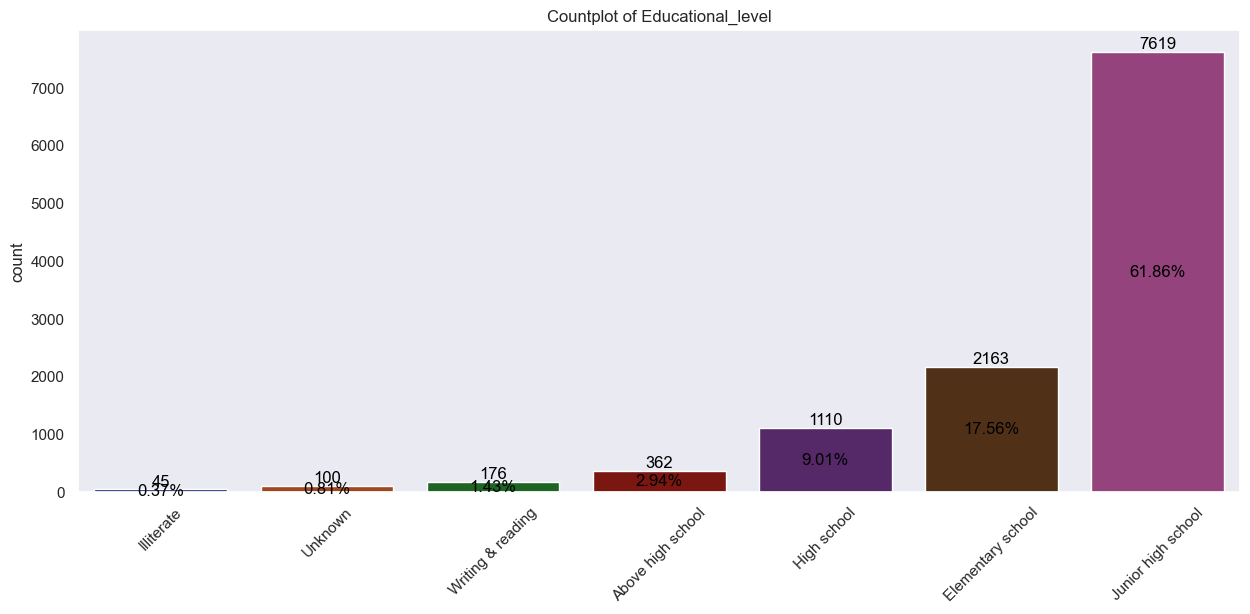

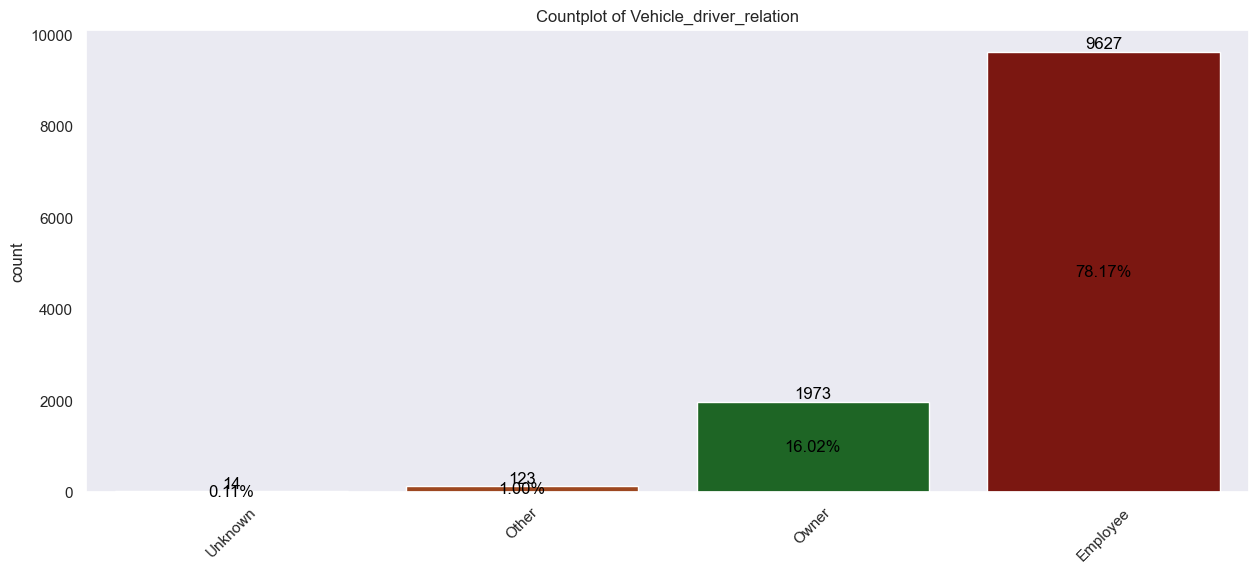

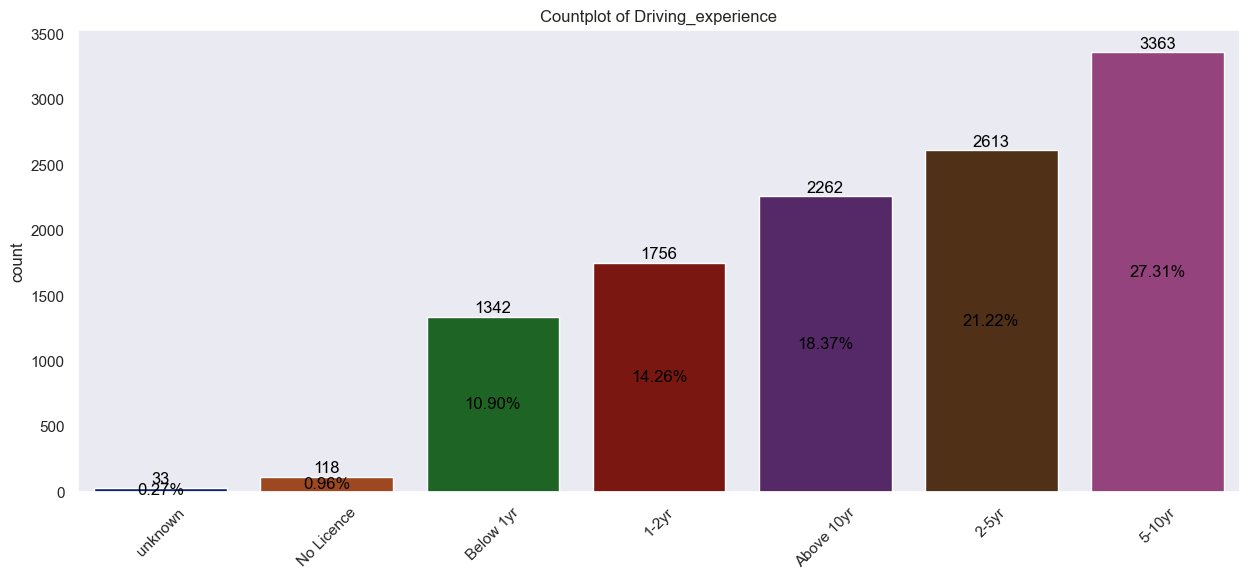

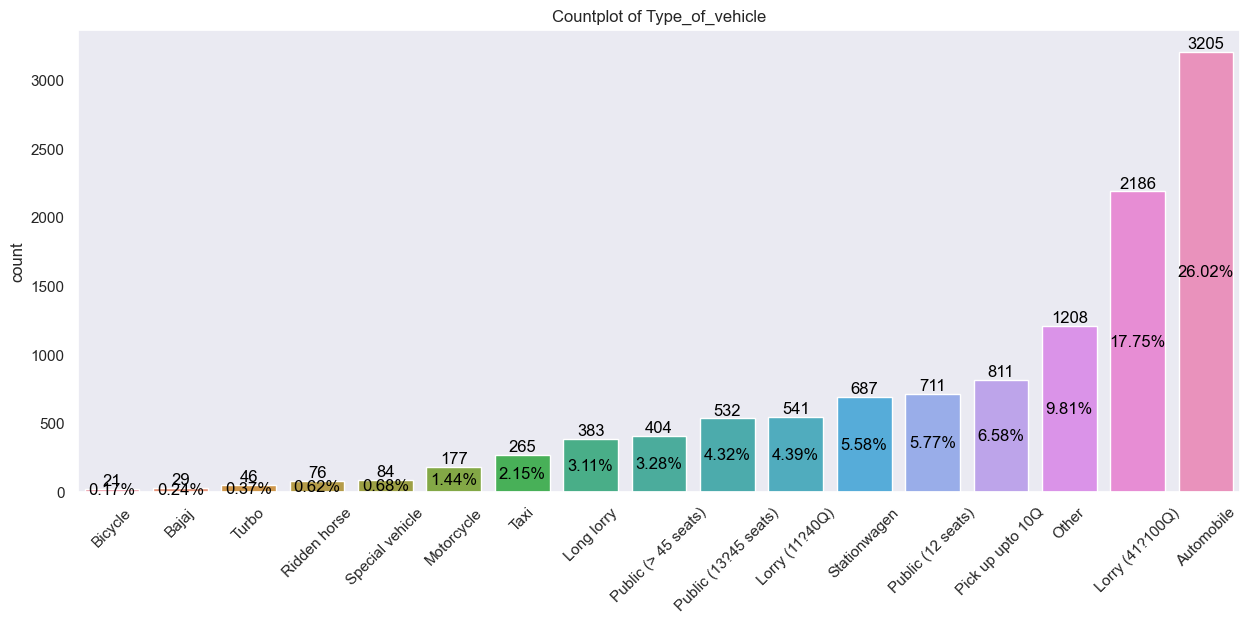

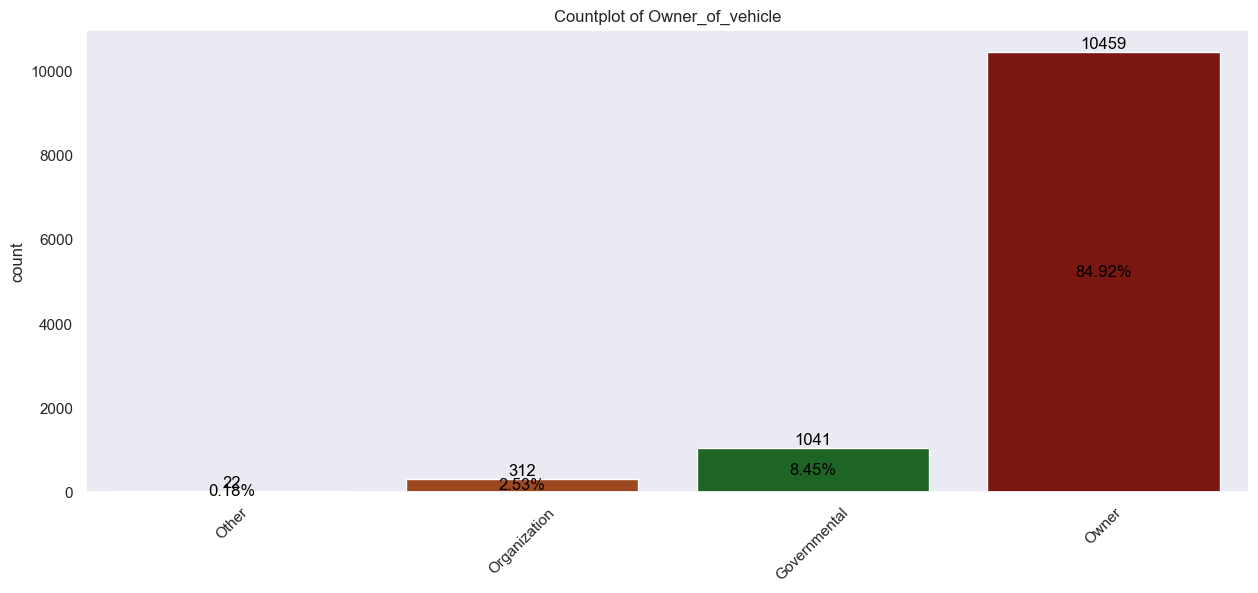

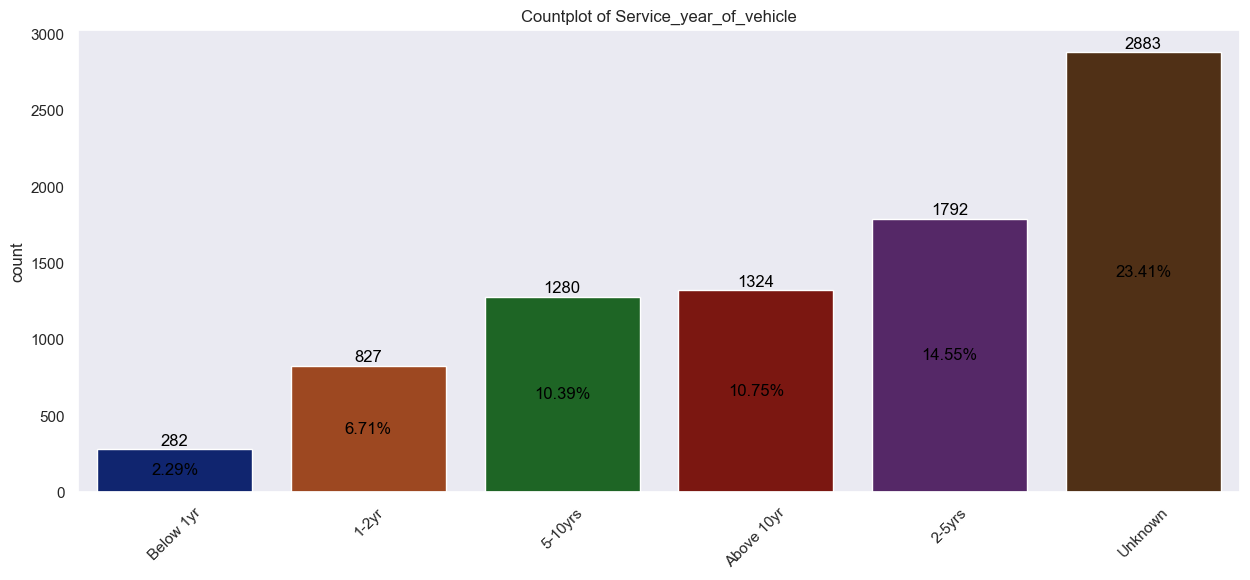

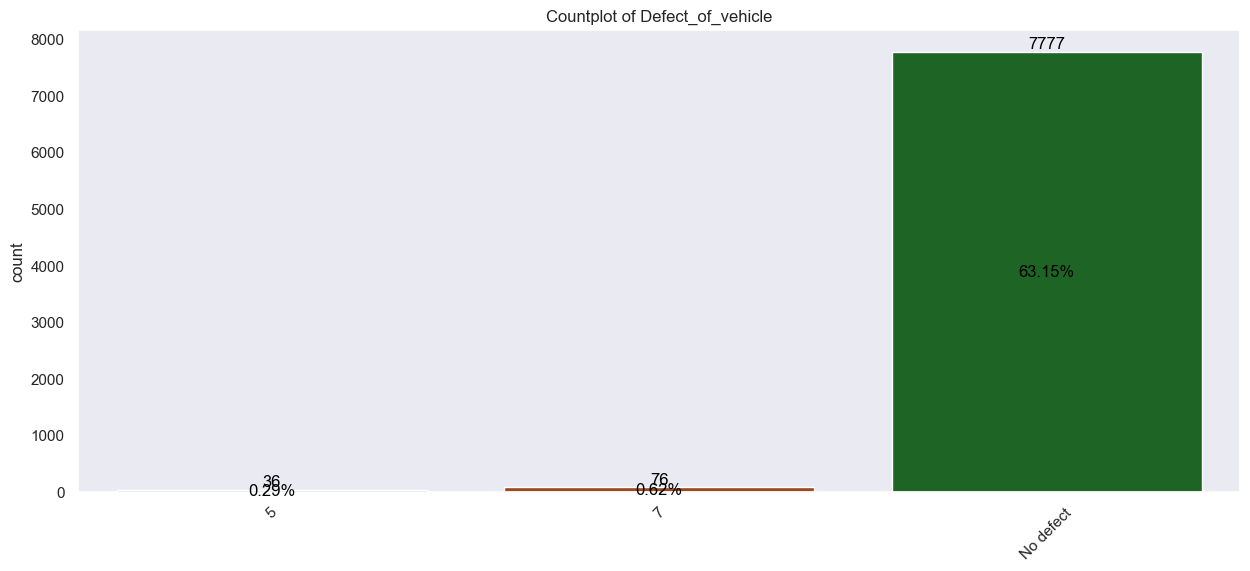

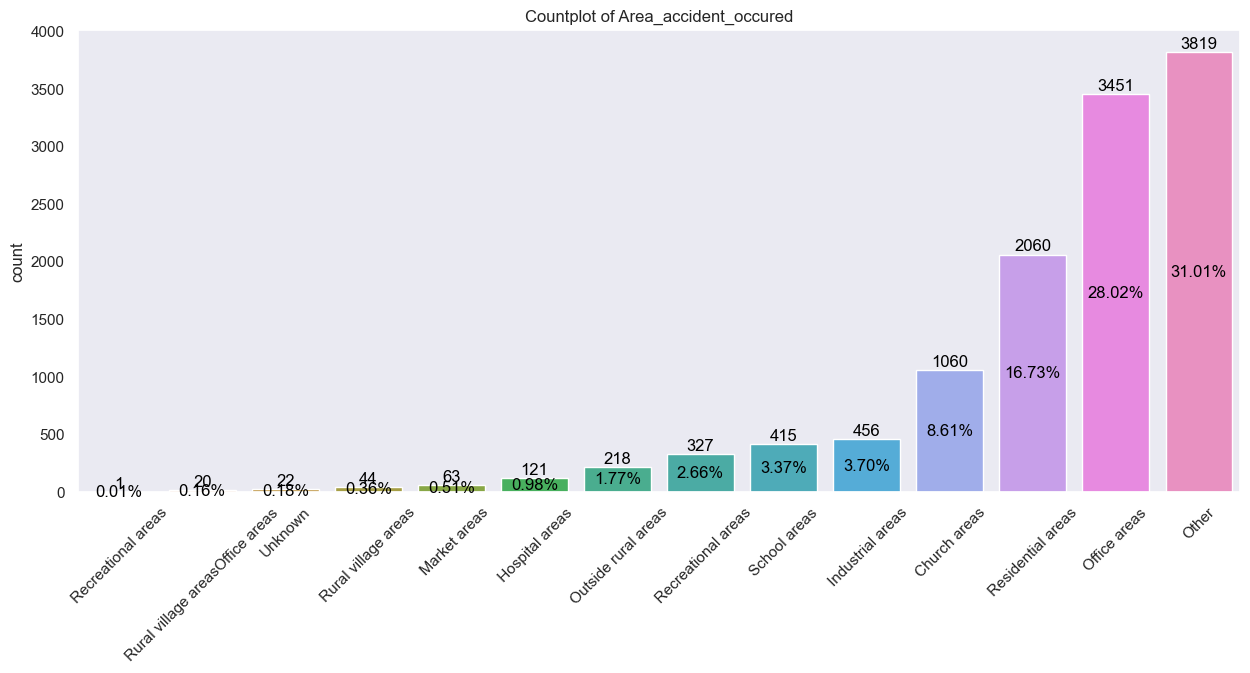

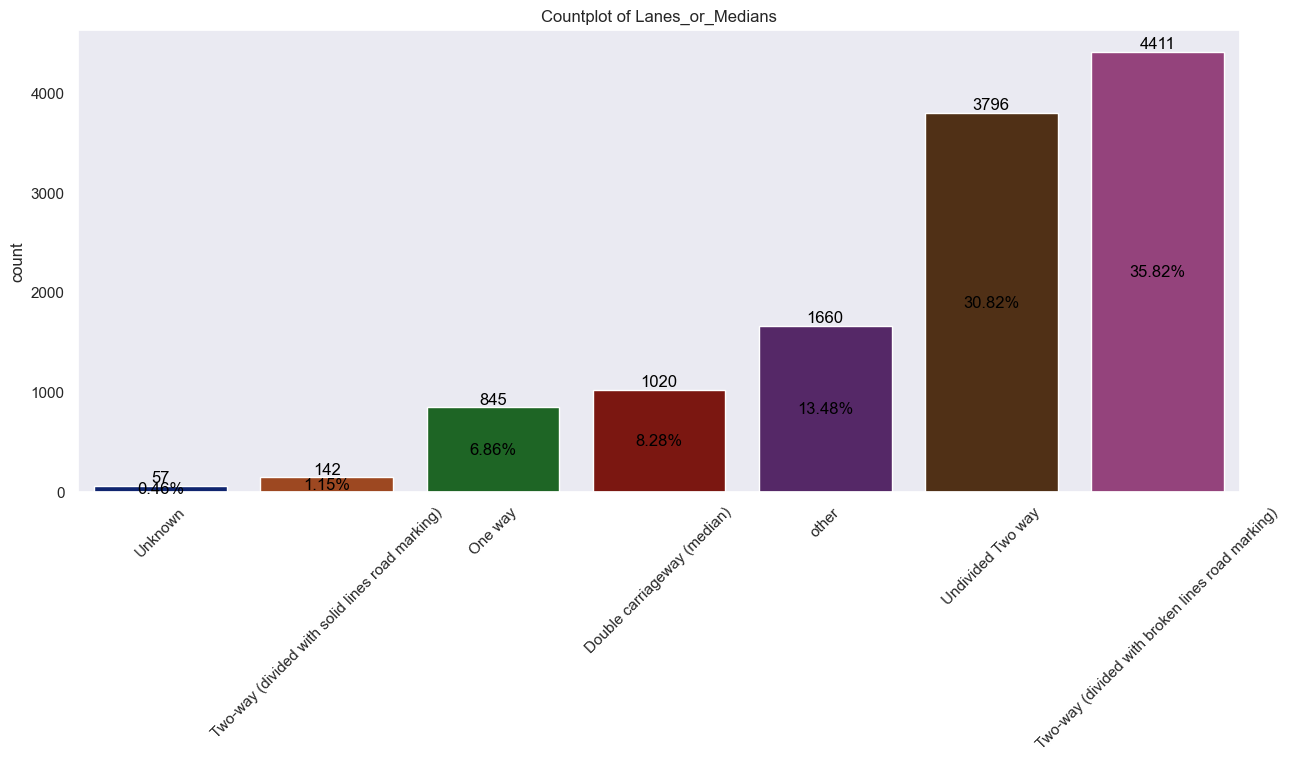

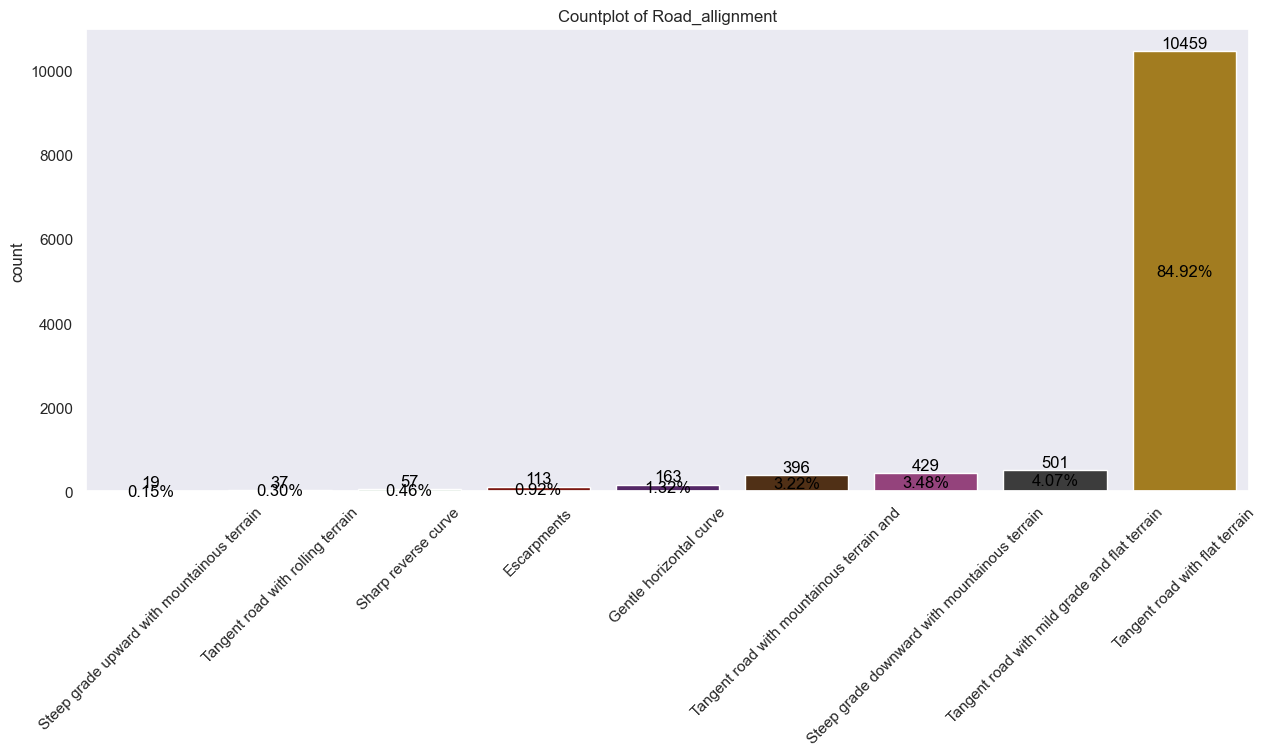

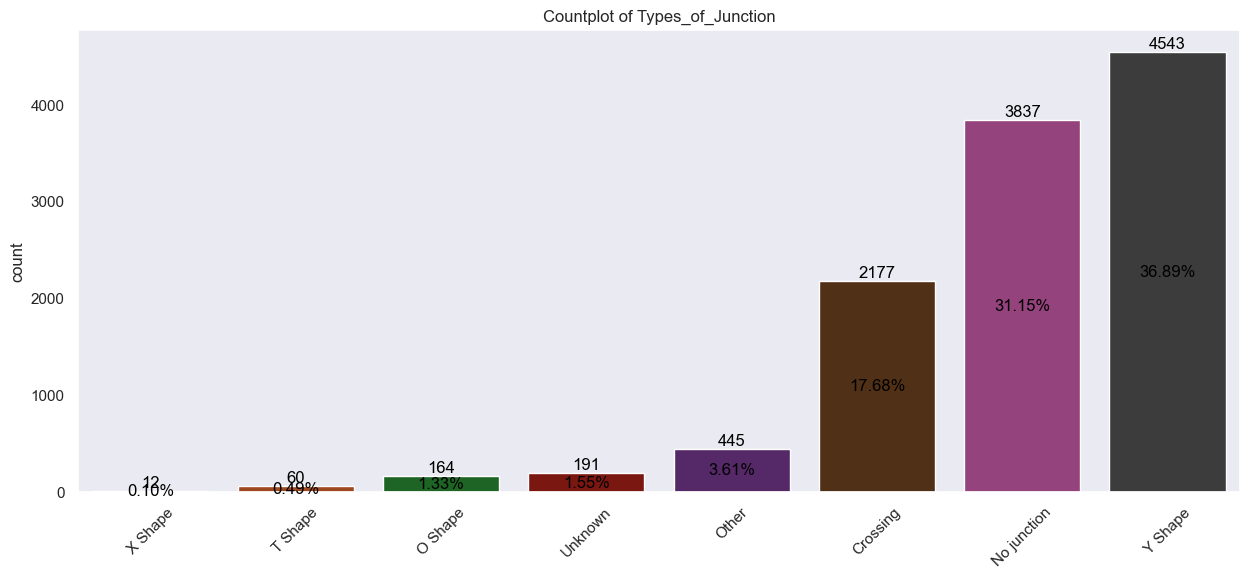

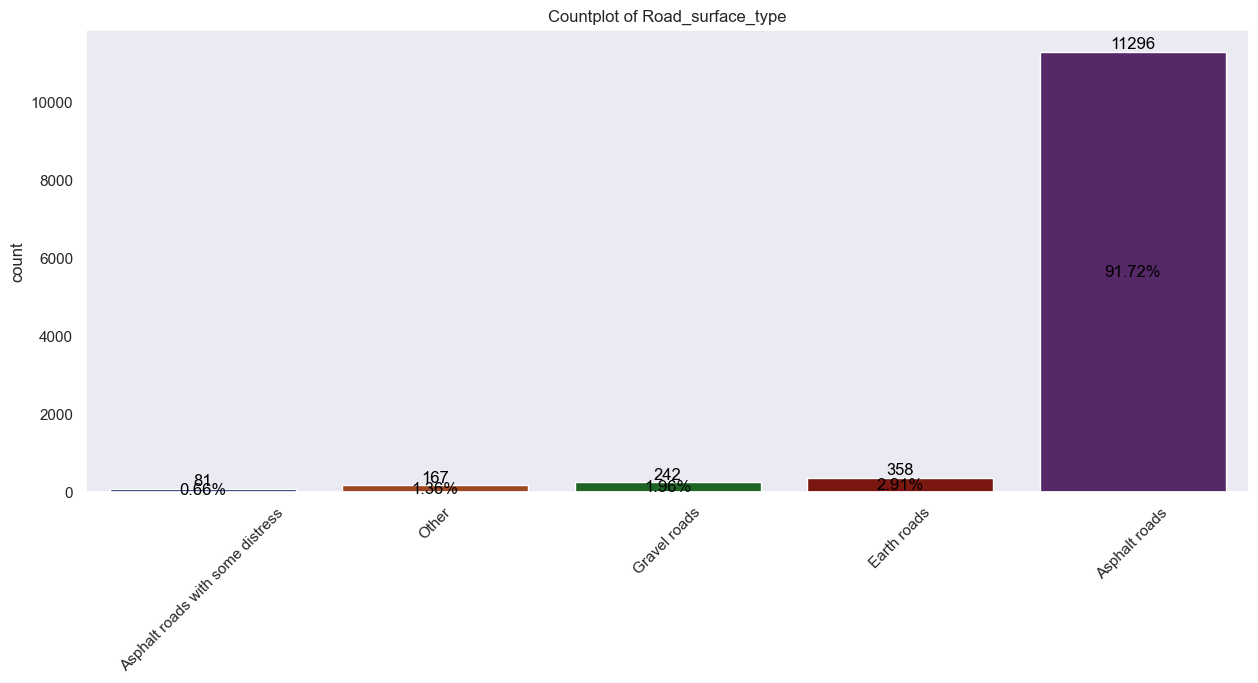

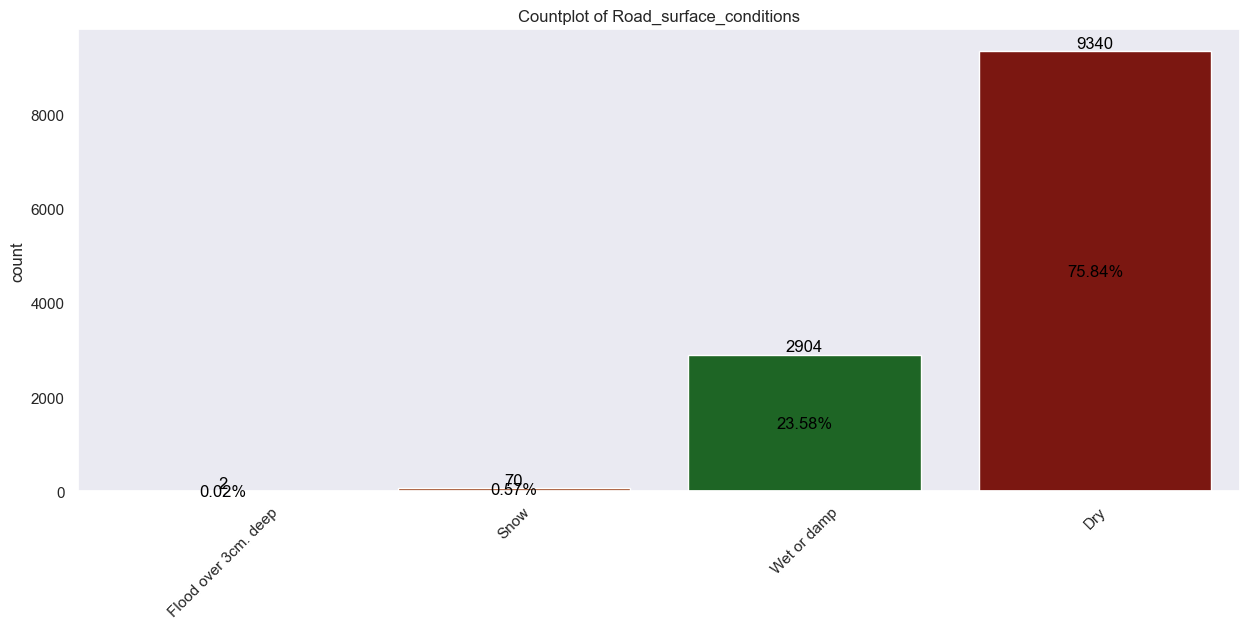

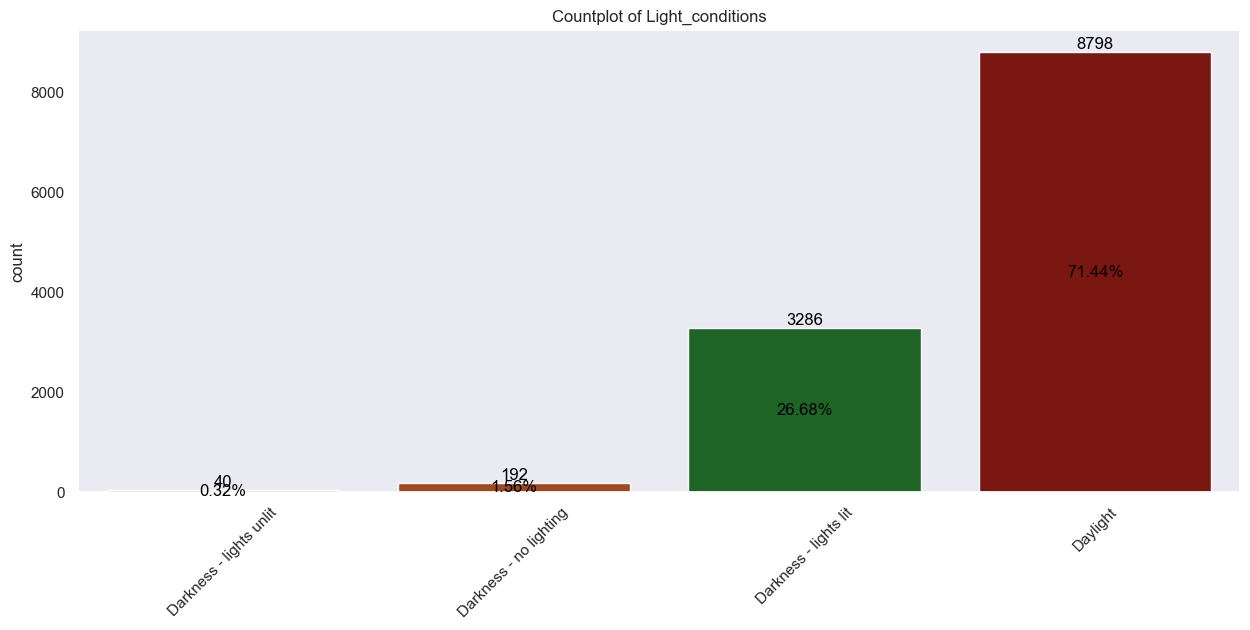

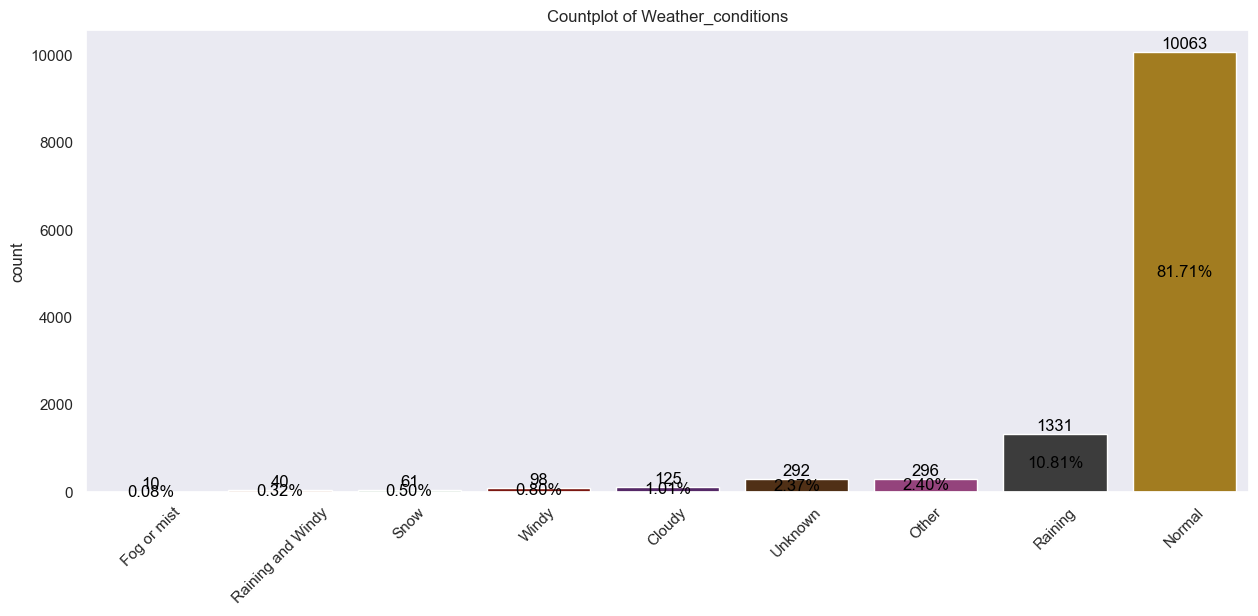

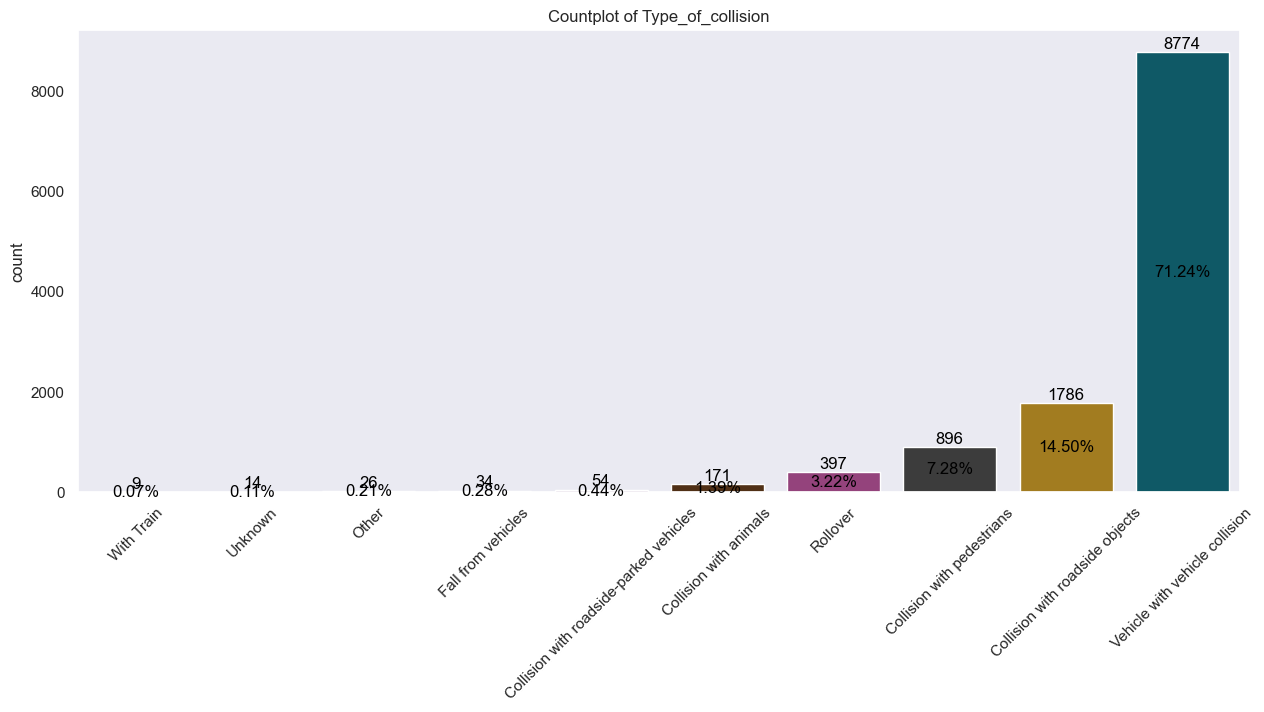

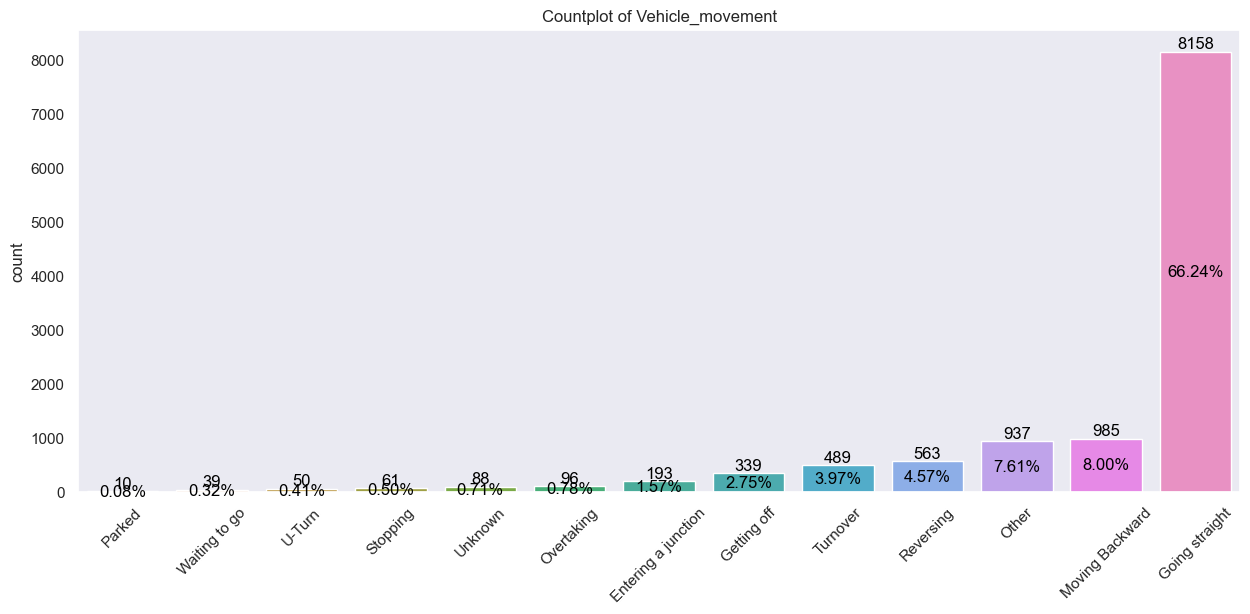

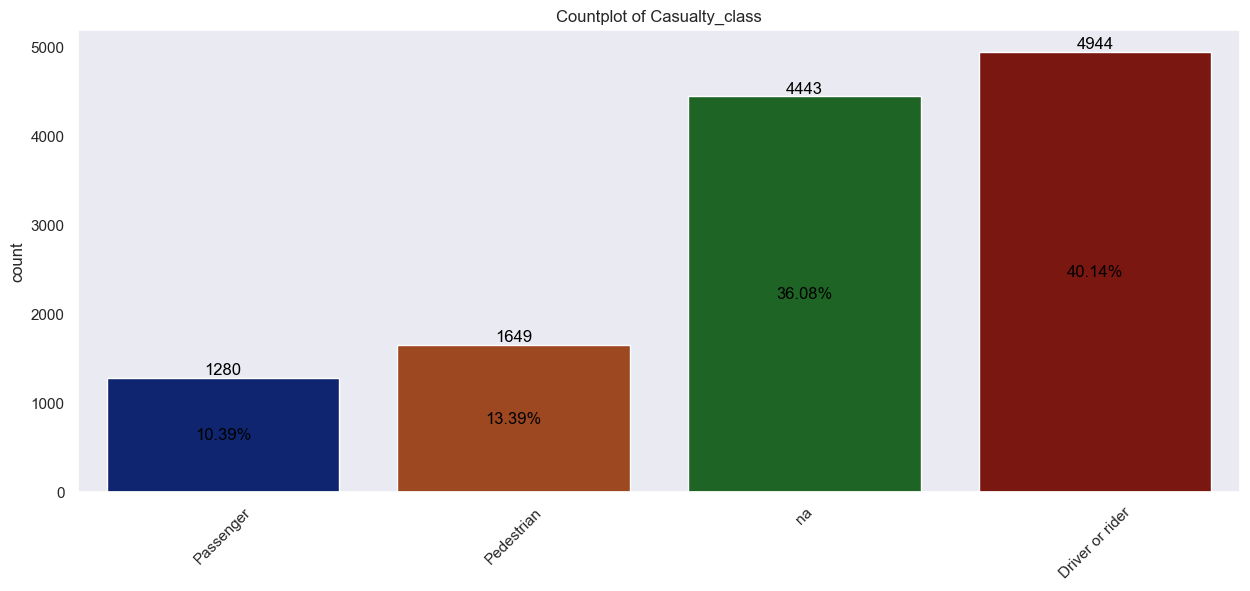

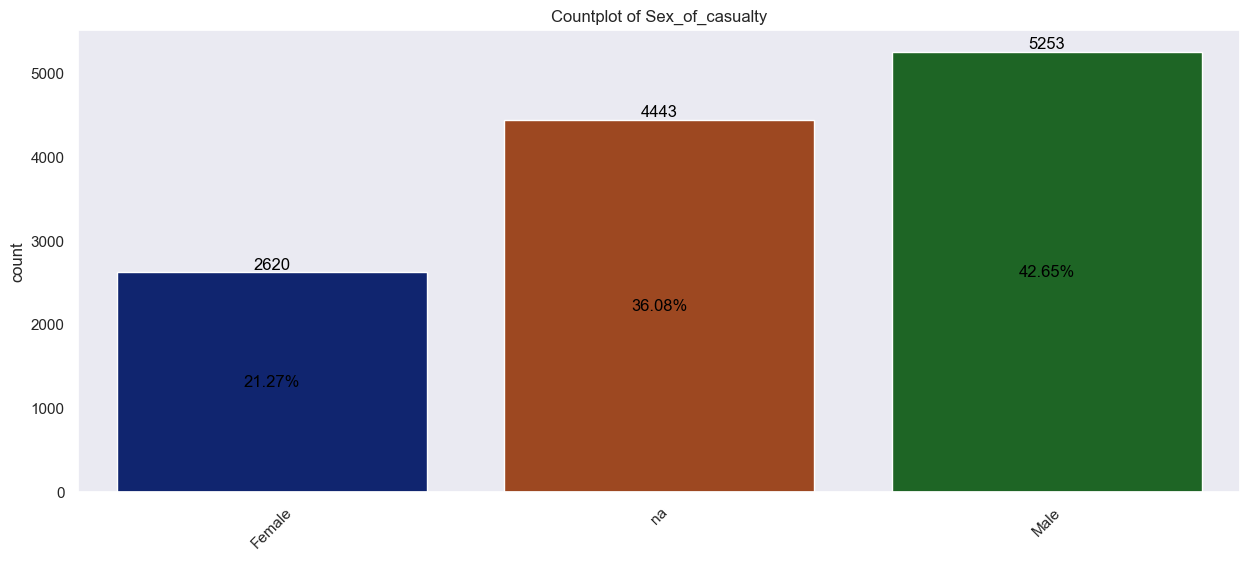

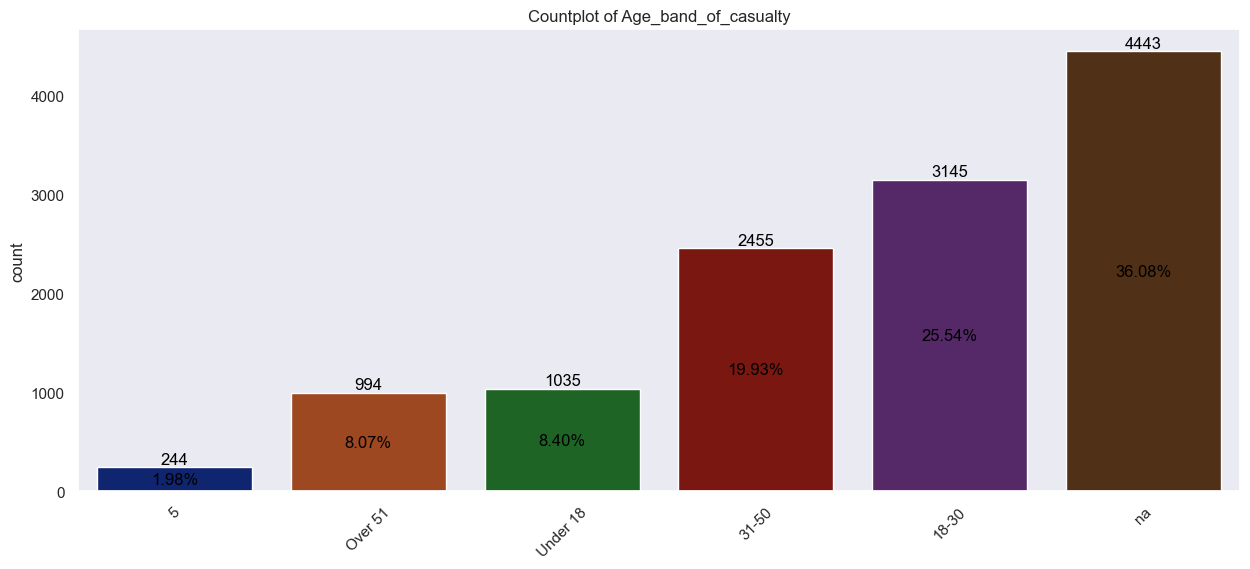

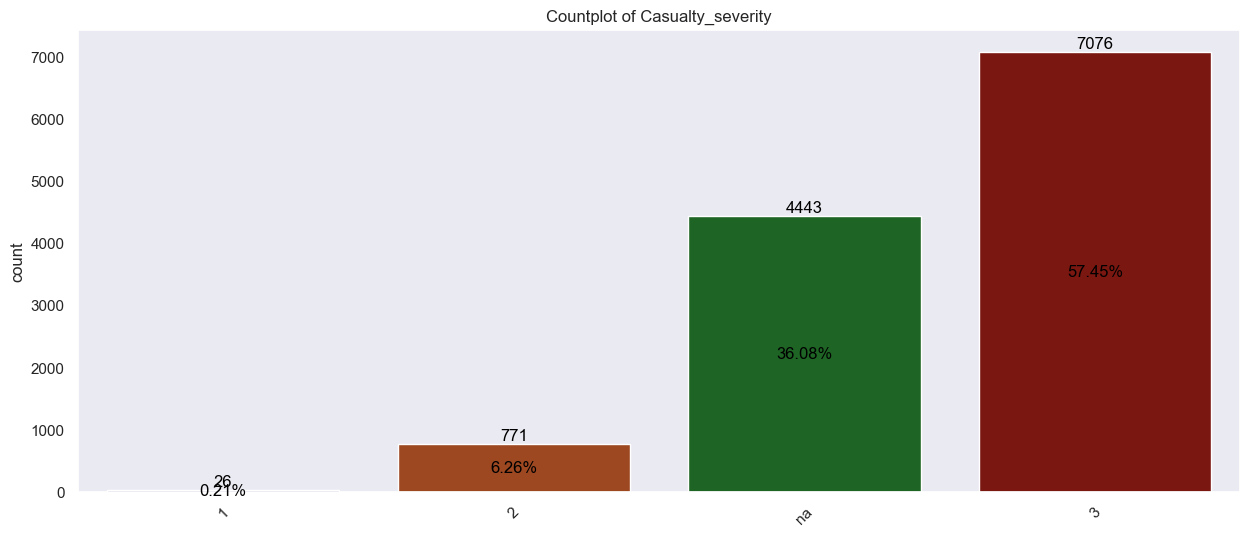

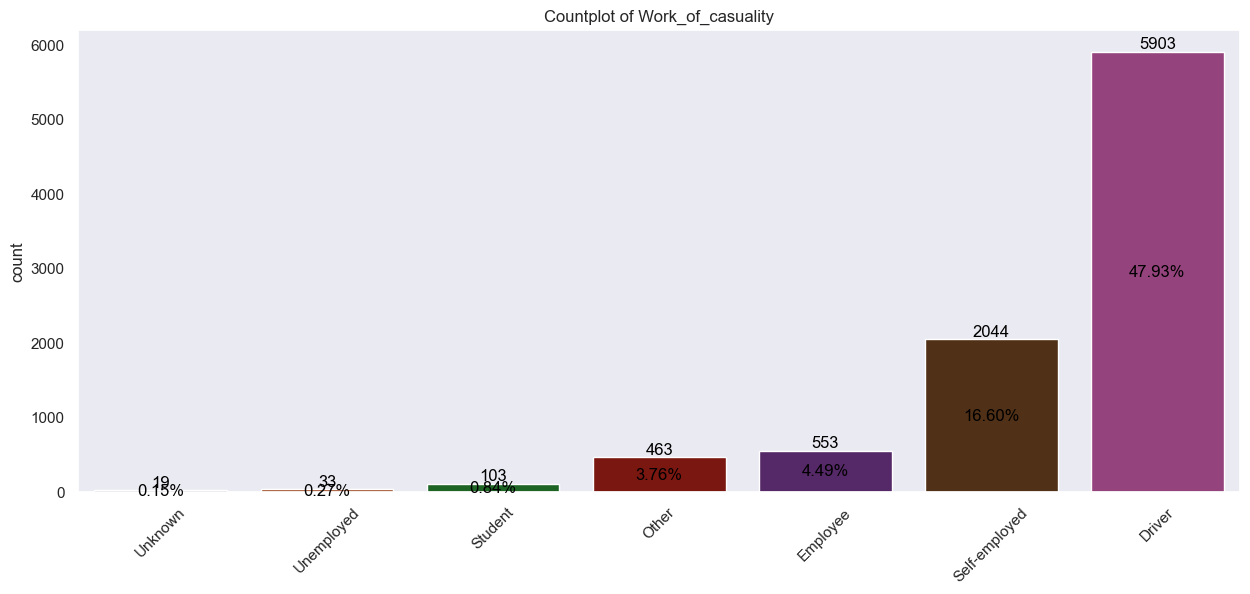

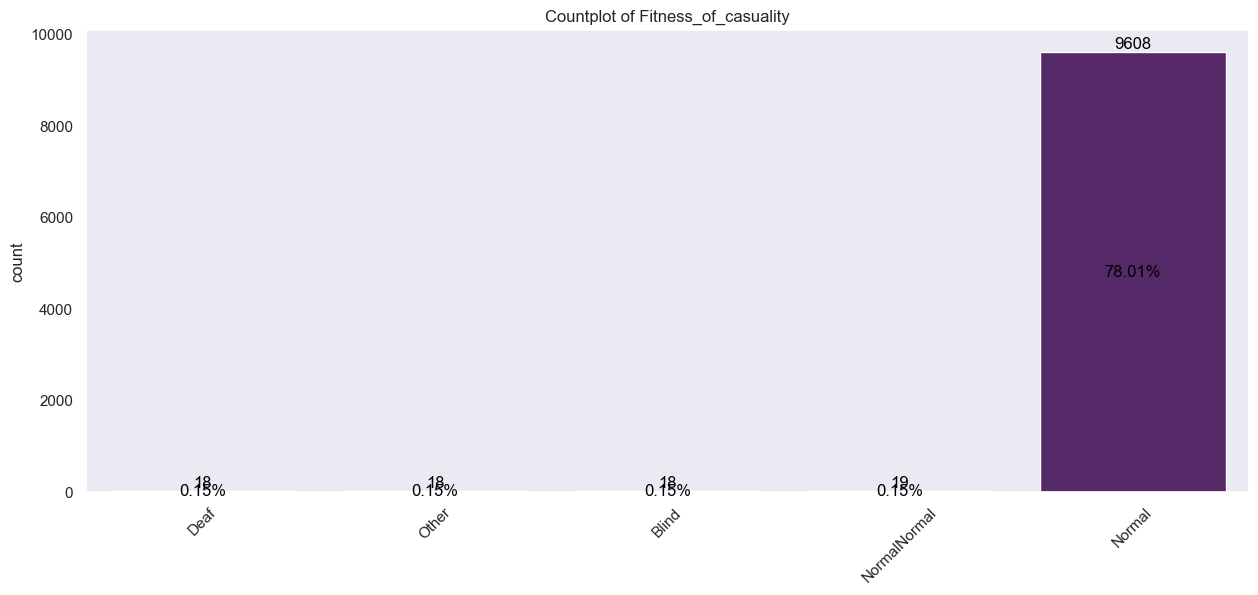

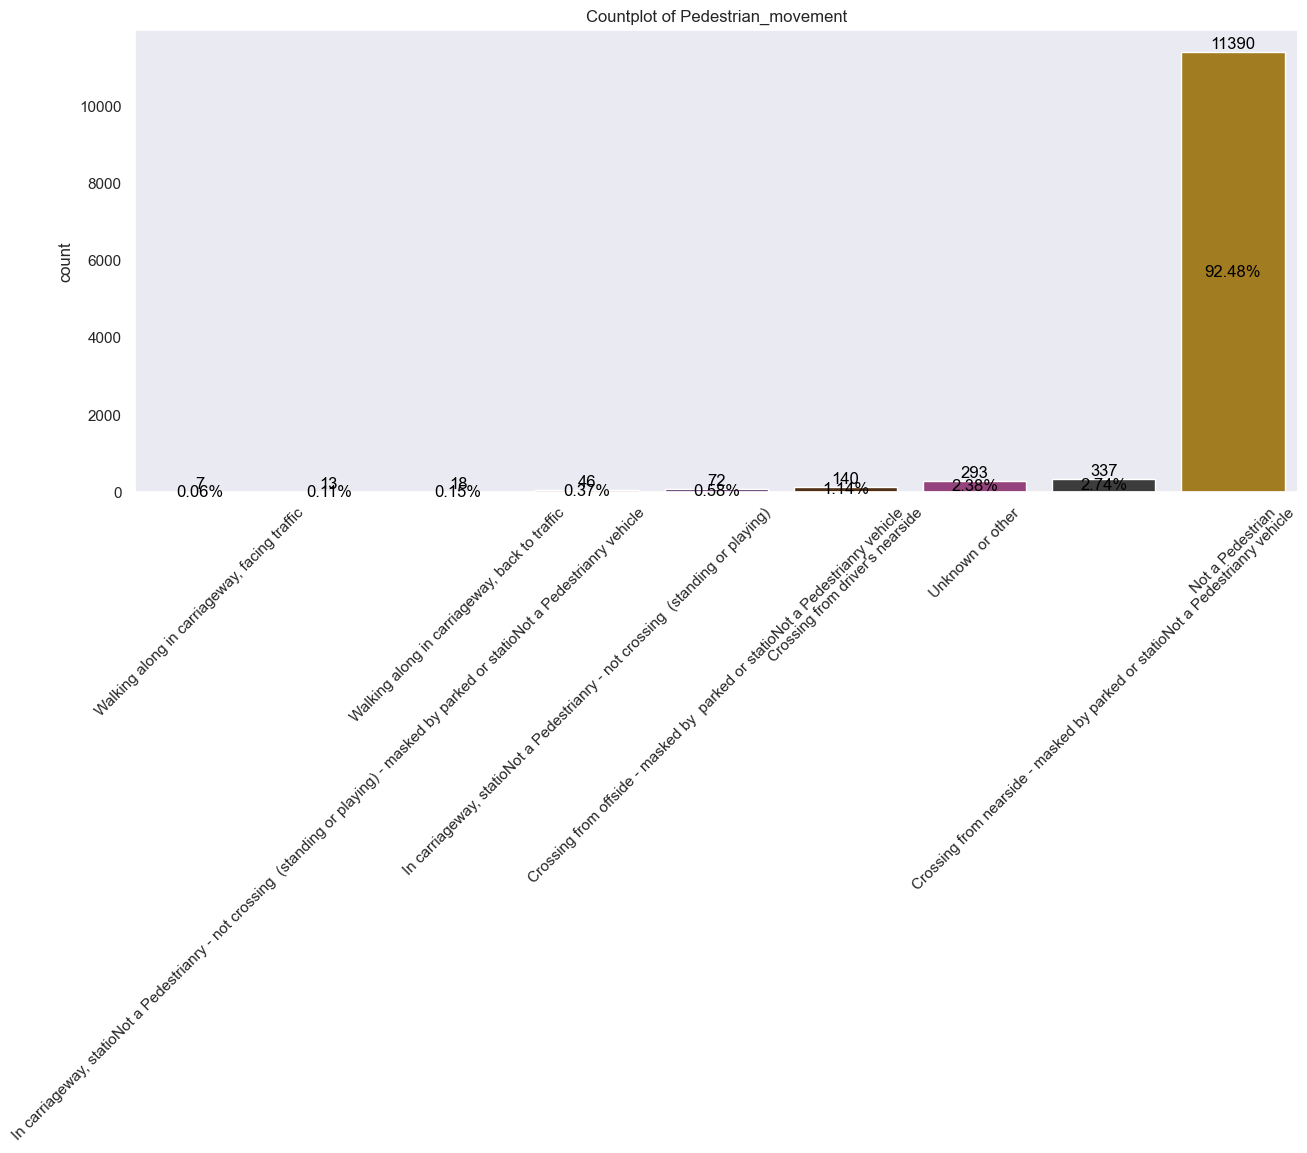

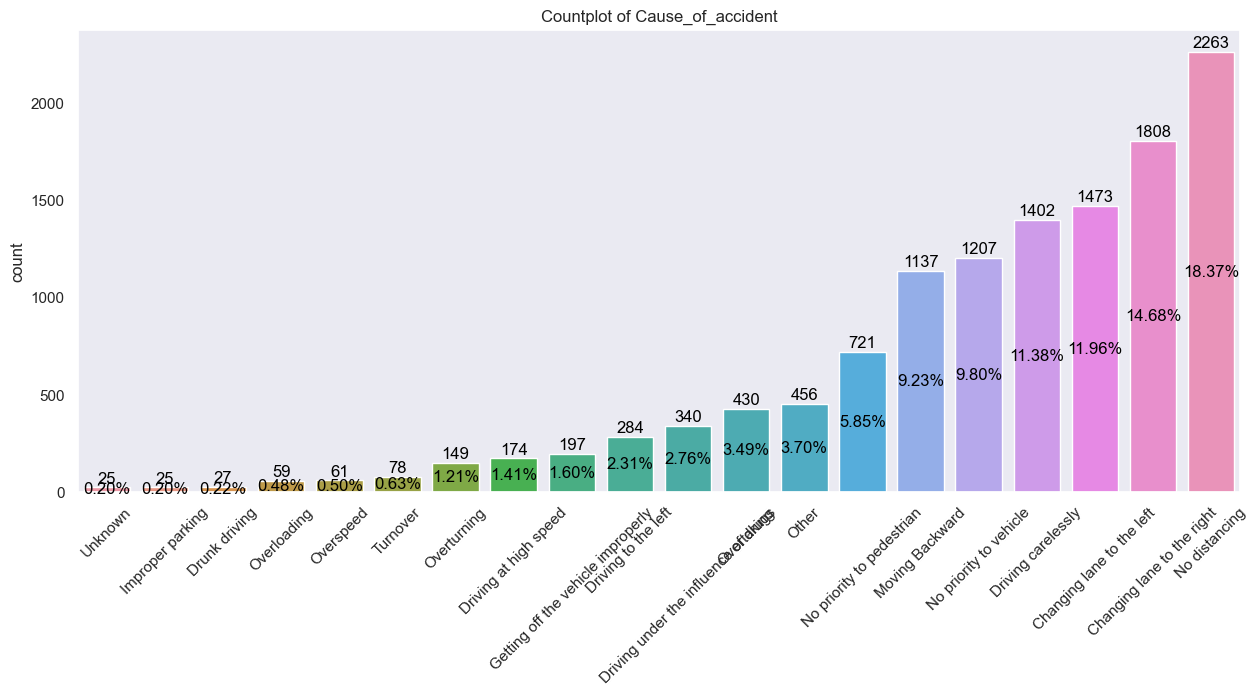

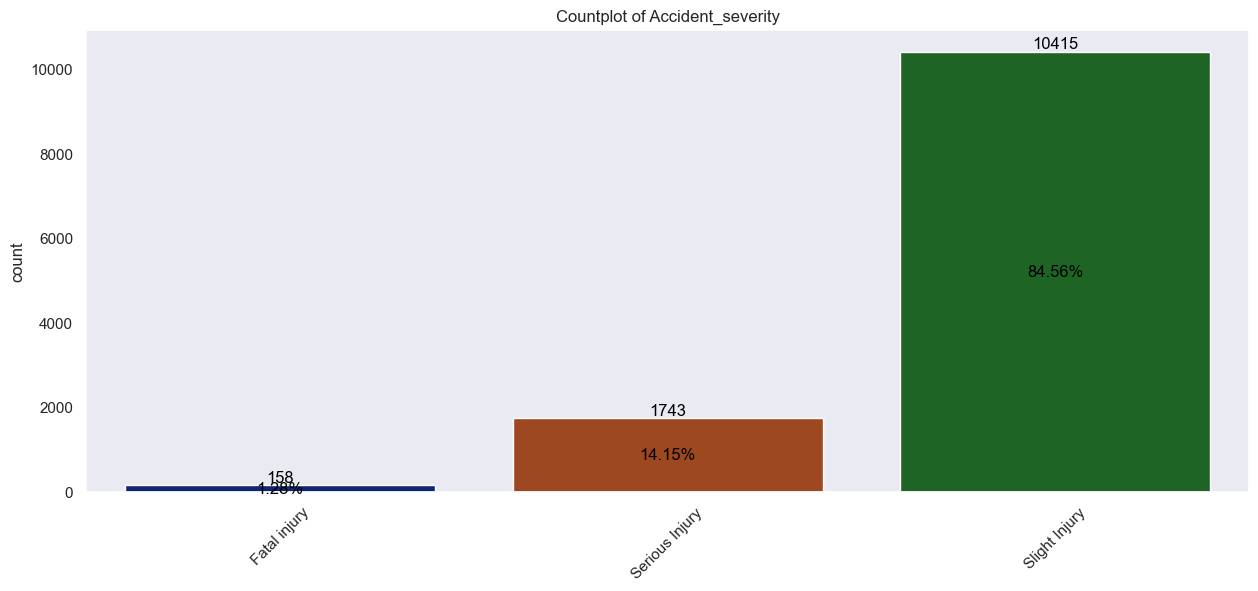

In [17]:
# Function to plot countplots of all categorical variables in an ascending order of count of each unique variable with unique values less than or equal to the argument unique_value_limit 
def plot_categorical_countplots(dataframe, unique_value_limit=0):
    categorical_columns = dataframe.select_dtypes(include=['object'])

    for column in categorical_columns.columns:
        unique_count = len(dataframe[column].unique())
        if unique_count <= unique_value_limit:
            plt.figure(figsize=(15, 6))
            ax = sns.countplot(data=dataframe, x=column,order= df[column].value_counts(ascending=True).index)
            plt.xticks(rotation=45)
            plt.title(f'Countplot of {column}')
            plt.xlabel('')

            total_count = len(dataframe[column])
            
            # Add text annotations for the count at the top and percentage in the middle of each bar
            for p in ax.patches:
                height = p.get_height()
                height = int(height)
                percentage = (height / total_count) * 100
                x = p.get_x() + p.get_width() / 2.
                y_top = height + 5  # Adjust the vertical position for the count
                y_middle = height / 2
                ax.annotate(f'{height}', 
                            (x, y_top),
                            ha='center', va='bottom', fontsize=12, color='black')
                ax.annotate(f'{percentage:.2f}%', 
                            (x, y_middle),
                            ha='center', va='center', fontsize=12, color='black')

            plt.show()


plot_categorical_countplots(df, unique_value_limit=20)

## Pre-processing


### Changing 'Time' variable to a Datetime type

In [18]:

df_datetime = df.copy(deep=True)

df_datetime['Time'] = pd.to_datetime(df_datetime['Time'])

df_datetime.head()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 2023-09-09 17:02:00      Monday              18-30          Male   
1 2023-09-09 17:02:00      Monday              31-50          Male   
2 2023-09-09 17:02:00      Monday              18-30          Male   
3 2023-09-09 01:06:00      Sunday              18-30          Male   
4 2023-09-09 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0           Automobile            Owner              Above 10yr   
1  Public (> 45 seats)            Owner                 5-10yrs   
2      Lorry (41?100Q)            Owner                     NaN   
3  Public (> 45 seats)     Governmental                     NaN   
4                  NaN            Owner                 5-10yrs   

  Defect_of_vehicle Area_accident_occured   Lanes_or_Medians  \
0         No defect     Residential areas                NaN   
1         No defect          Office areas  Undivided Two way   
2         No defect    Recreational areas              other   
3         No defect          Office areas              other   
4         No defect      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3       

In [19]:
# Extracting the hour from Time variable and storing it into new column
df_datetime['Hour'] = df_datetime['Time'].dt.hour

# Extracting the Minute from Time variable and storing it into new column
df_datetime['Minute'] = df_datetime['Time'].dt.minute

df_datetime.head()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 2023-09-09 17:02:00      Monday              18-30          Male   
1 2023-09-09 17:02:00      Monday              31-50          Male   
2 2023-09-09 17:02:00      Monday              18-30          Male   
3 2023-09-09 01:06:00      Sunday              18-30          Male   
4 2023-09-09 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0           Automobile            Owner              Above 10yr   
1  Public (> 45 seats)            Owner                 5-10yrs   
2      Lorry (41?100Q)            Owner                     NaN   
3  Public (> 45 seats)     Governmental                     NaN   
4                  NaN            Owner                 5-10yrs   

  Defect_of_vehicle Area_accident_occured   Lanes_or_Medians  \
0         No defect     Residential areas                NaN   
1         No defect          Office areas  Undivided Two way   
2         No defect    Recreational areas              other   
3         No defect          Office areas              other   
4         No defect      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3       

In [20]:
print(f"Number of unique value in Hour column: {df_datetime['Hour'].nunique()}")
print(df_datetime['Hour'].value_counts().sort_values(ascending=False))

print(f"Number of unique value in Minute column: {df_datetime['Minute'].nunique()}")
print(df_datetime['Minute'].value_counts().sort_values(ascending=False))

Number of unique value in Hour column: 24
Hour
17    1228
18     956
16     921
15     874
8      828
13     772
19     708
12     691
14     639
20     604
11     603
9      559
7      532
10     500
22     402
21     401
6      214
23     209
0      206
1      134
4       91
3       84
2       84
5       76
Name: count, dtype: int64
Number of unique value in Minute column: 60
Minute
30    1140
0     1089
40     697
10     691
50     620
20     606
15     595
45     587
55     487
25     486
35     444
5      405
43     147
46     140
32     139
57     137
8      121
16     116
48     116
2      116
28     108
29     107
12     107
47     106
36     105
4      105
1      104
44     103
23     102
17     100
41      99
49      98
51      98
58      98
19      97
39      96
56      92
53      89
11      84
18      83
9       83
26      81
31      80
59      80
7       80
13      79
34      78
21      78
38      78
42      76
22      75
24      75
54      74
27      71
52      70
33     

In [21]:
df_datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

<Axes: xlabel='Hour', ylabel='count'>

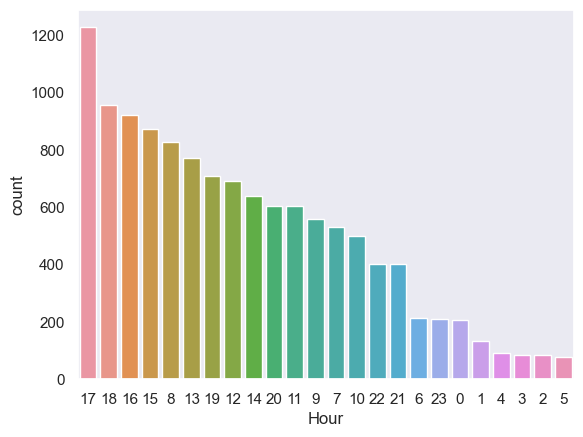

In [22]:
sns.countplot(data=df_datetime,x='Hour', order=df_datetime['Hour'].value_counts(ascending=False).index)

In [23]:
df_datetime['Minute'].value_counts()

Minute
30    1140
0     1089
40     697
10     691
50     620
20     606
15     595
45     587
55     487
25     486
35     444
5      405
43     147
46     140
32     139
57     137
8      121
16     116
48     116
2      116
28     108
29     107
12     107
47     106
36     105
4      105
1      104
44     103
23     102
17     100
41      99
49      98
51      98
58      98
19      97
39      96
56      92
53      89
11      84
18      83
9       83
26      81
31      80
59      80
7       80
13      79
34      78
21      78
38      78
42      76
22      75
24      75
54      74
27      71
52      70
33      70
14      68
6       54
37      54
3       52
Name: count, dtype: int64

In [24]:
# Dropping the Time column

df_datetime.drop(['Time', 'Minute'], axis=1, inplace=True)

In [25]:
df_datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

### Inconsitent values treatement


In [26]:
df_inconsitent = df_datetime.copy(deep=True)

# Replace '7' and '5' with 'No_defect' in column 'Defect_of_vehicle'
df_inconsitent['Defect_of_vehicle'] = df_inconsitent['Defect_of_vehicle'].replace(['7', '5'], 'Defective')

In [27]:
# Replace 'NormalNormal' with 'Normal' in Fitness_of_casuality column
df_inconsitent['Fitness_of_casuality'] = df_inconsitent['Fitness_of_casuality'].replace('NormalNormal', 'Normal')

### Missing values


In [28]:
df_toimpute = df_inconsitent.copy(deep=True)

In [29]:
# Replace 'na', 'Unknown', and 'unknown' with NaN in the entire DataFrame
df_toimpute.replace(['na', 'Unknown', 'unknown'], np.nan, inplace=True)

# Watching the missing values
missing_values_table(df_toimpute)

Your selected dataframe has 32 columns.
There are 24 columns that have missing values.


Missing Values  % of Total Values
Service_year_of_vehicle            6811               55.3
Casualty_class                     4443               36.1
Casualty_severity                  4443               36.1
Age_band_of_casualty               4443               36.1
Sex_of_casualty                    4443               36.1
Defect_of_vehicle                  4427               35.9
Work_of_casuality                  3217               26.1
Fitness_of_casuality               2635               21.4
Age_band_of_driver                 1548               12.6
Types_of_Junction                  1078                8.8
Type_of_vehicle                     950                7.7
Driving_experience                  862                7.0
Educational_level                   841                6.8
Vehicle_driver_relation             593                4.8
Owner_of_vehicle                    482                3.9
Lanes_or_Medians                    442                3.6
Vehicle_movement                    396                3.2
Weather_conditions                  292                2.4
Area_accident_occured               261                2.1
Sex_of_driver                       178                1.4
Road_surface_type                   172                1.4
Type_of_collision                   169                1.4
Road_allignment                     142                1.2
Cause_of_accident                    25                0.2

In [30]:
# Function that imputes with mode when percentage of missing value is less than or equal to 10% and greater than that with a new value called 'Unknown'
def impute_categorical_missing(df):
    # Calculate the percentage of missing values for each column
    missing_percent = (df.isnull().sum() / len(df)) * 100

    # Define a threshold (10%) for deciding the imputation method
    threshold = 10

    # Iterate through columns with missing values
    for col in df.columns:
        if col in missing_percent.index:
            if missing_percent[col] <= threshold:
                # Impute missing values with the mode for columns with <= 10% missing
                mode_value = df[col].mode().values[0]
                df[col].fillna(mode_value, inplace=True)
            else:
                # Impute missing values with 'Unknown' for columns with > 10% missing
                df[col].fillna('Unknown', inplace=True)

    return df


df_toimpute = impute_categorical_missing(df_toimpute)
df_toimpute.isnull().sum()


Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

In [31]:
unique_values_per_column(df_toimpute,30)

Column: Day_of_week
Number of Unique values: 7
Unique values: Monday, Sunday, Friday, Wednesday, Saturday, Thursday, Tuesday

Column: Age_band_of_driver
Number of Unique values: 5
Unique values: 18-30, 31-50, Under 18, Over 51, Unknown

Column: Sex_of_driver
Number of Unique values: 2
Unique values: Male, Female

Column: Educational_level
Number of Unique values: 6
Unique values: Above high school, Junior high school, Elementary school, High school, Illiterate, Writing & reading

Column: Vehicle_driver_relation
Number of Unique values: 3
Unique values: Employee, Owner, Other

Column: Driving_experience
Number of Unique values: 6
Unique values: 1-2yr, Above 10yr, 5-10yr, 2-5yr, No Licence, Below 1yr

Column: Type_of_vehicle
Number of Unique values: 17
Unique values: Automobile, Public (> 45 seats), Lorry (41?100Q), Public (13?45 seats), Lorry (11?40Q), Long lorry, Public (12 seats), Taxi, Pick up upto 10Q, Stationwagen, Ridden horse, Other, Bajaj, Turbo, Motorcycle, Special vehicle, Bic

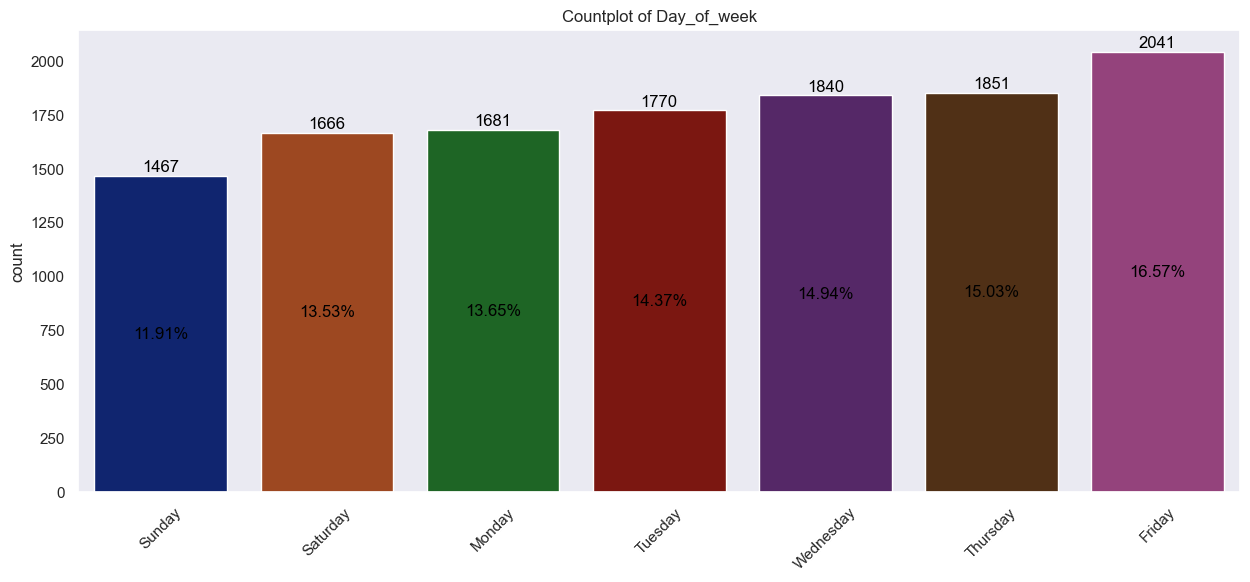

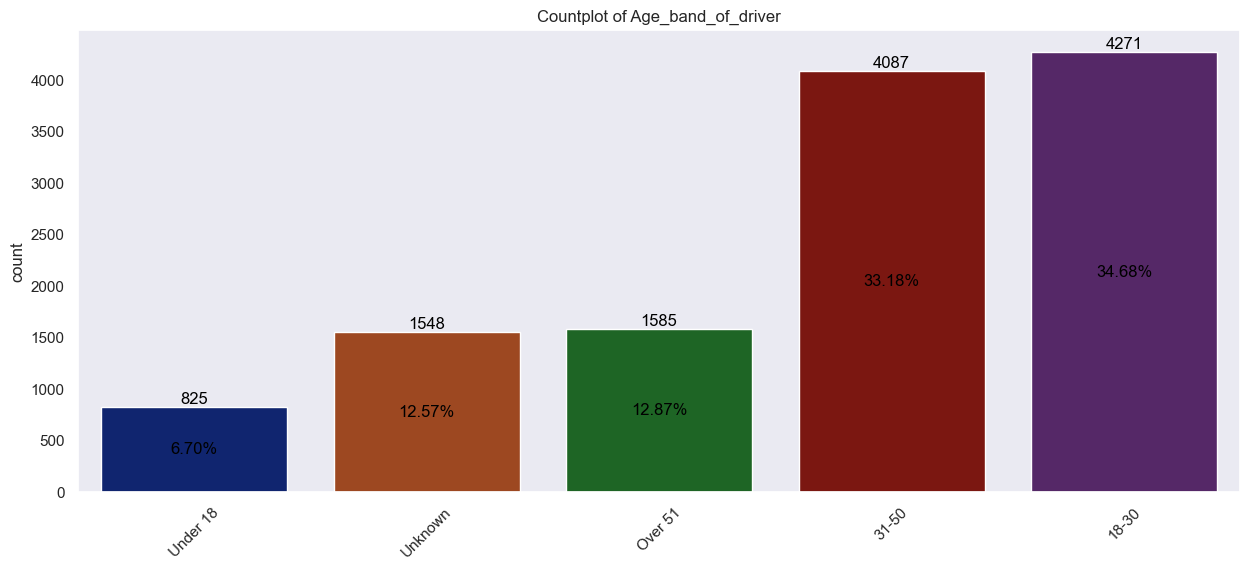

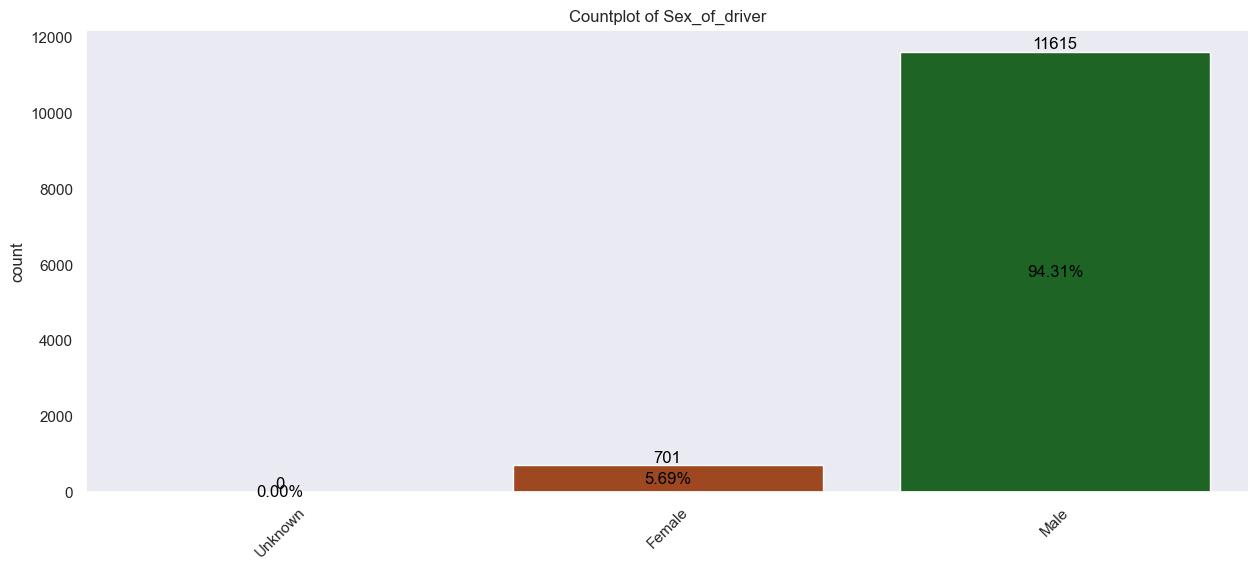

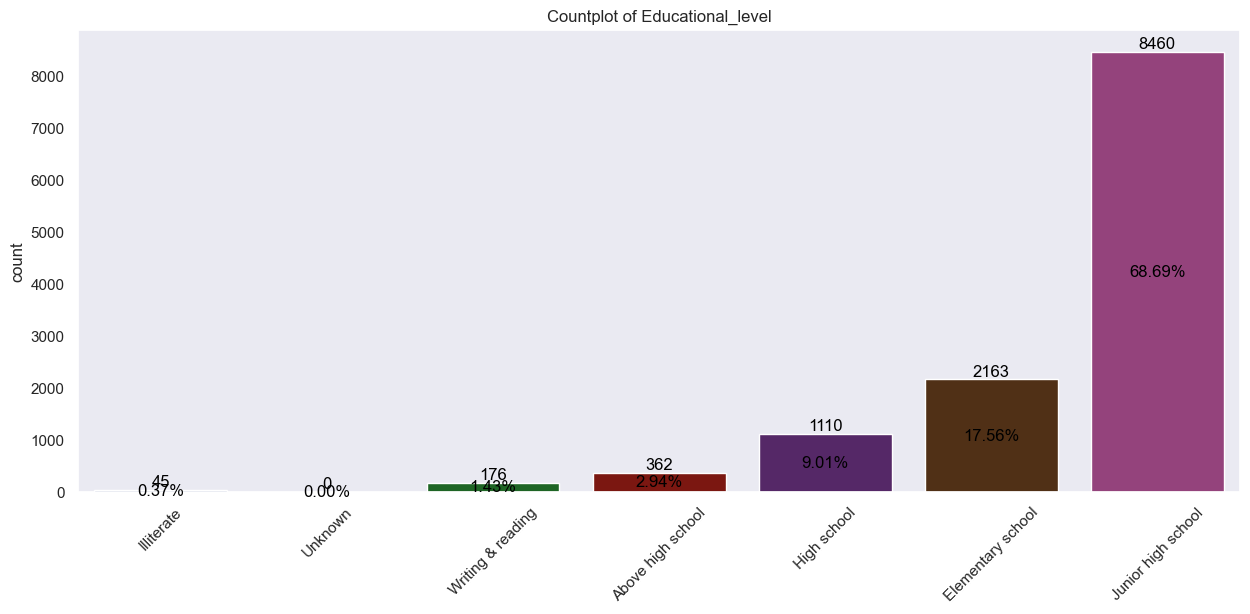

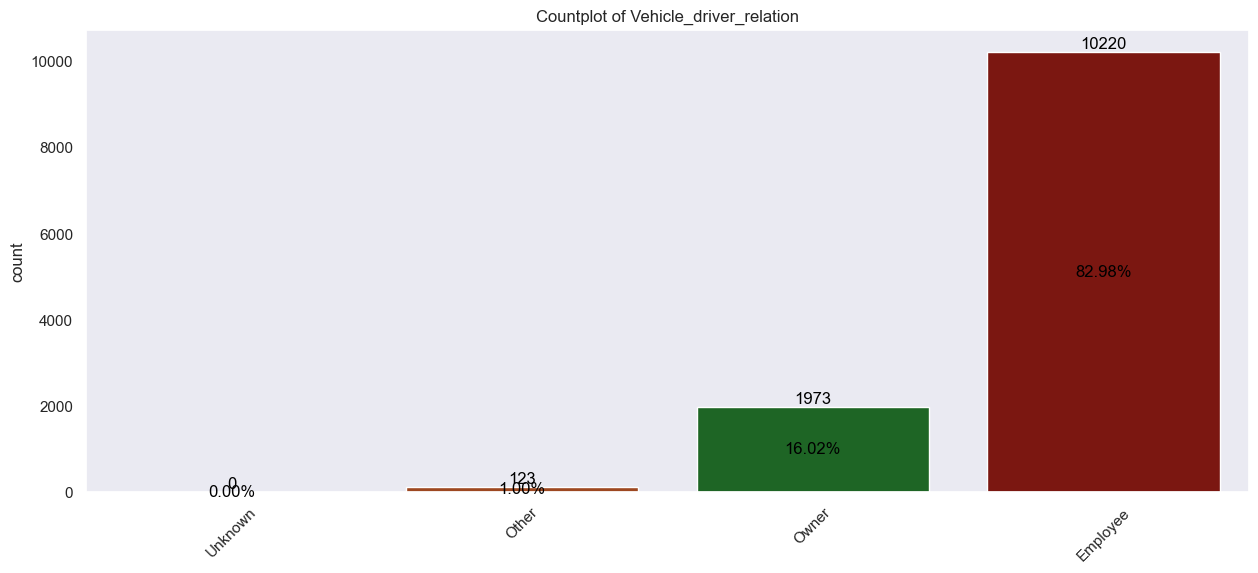

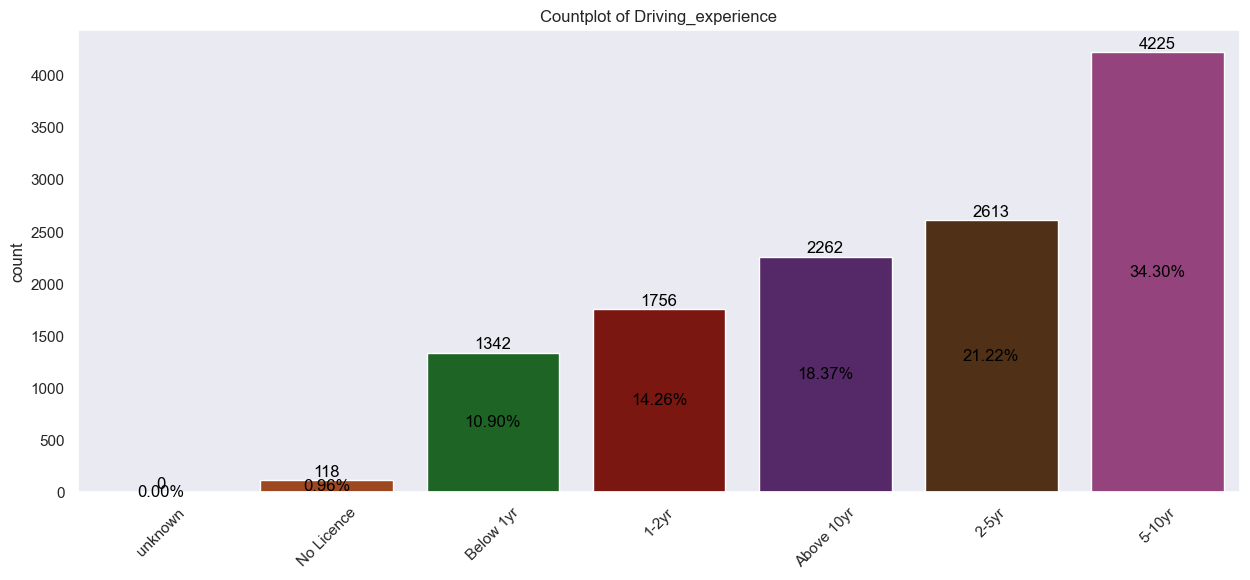

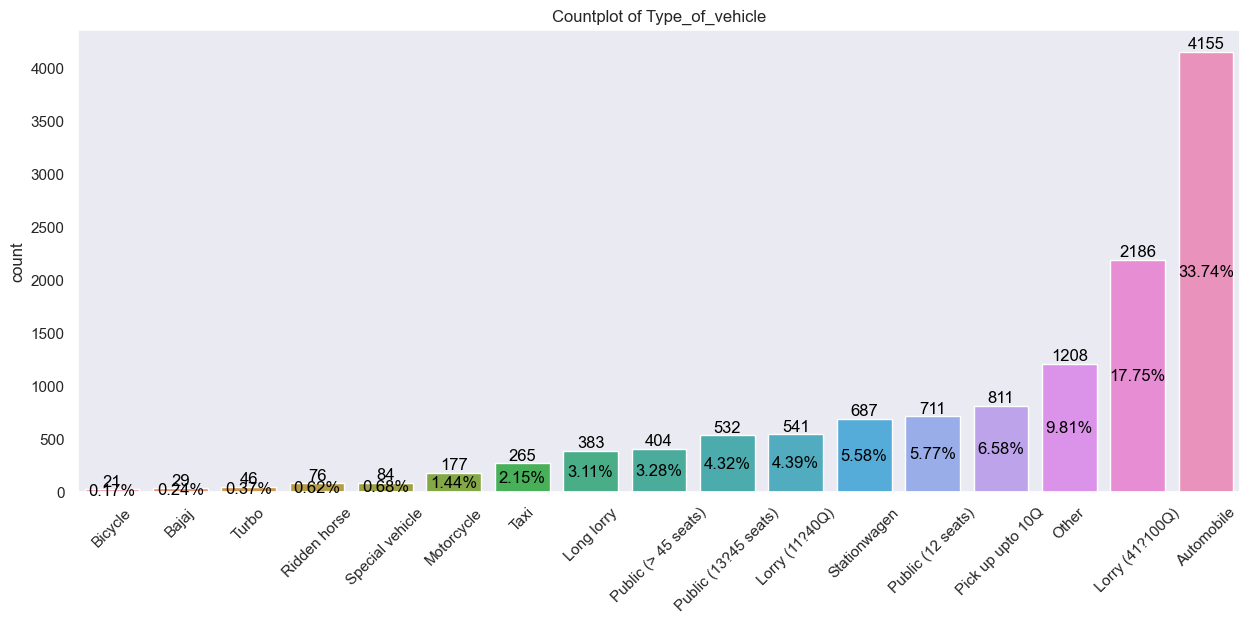

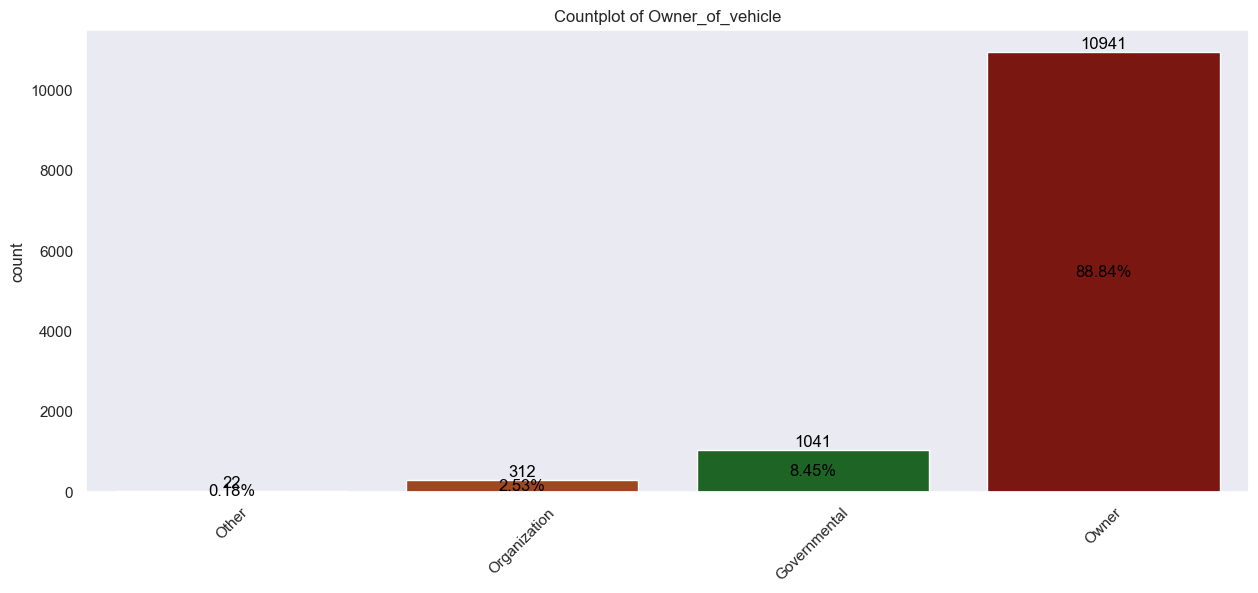

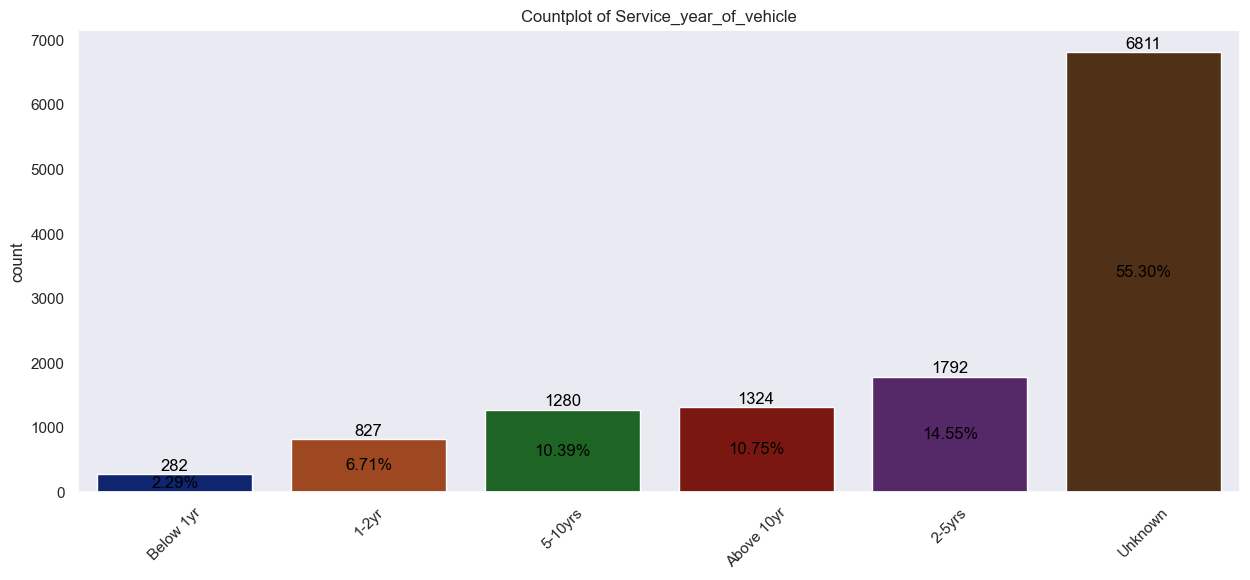

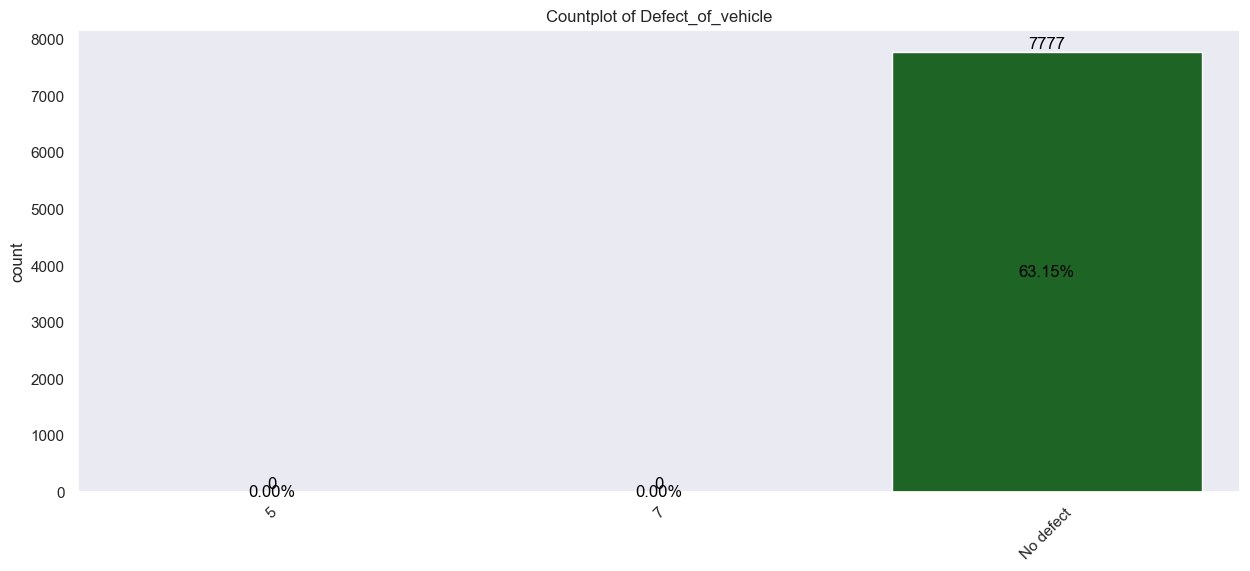

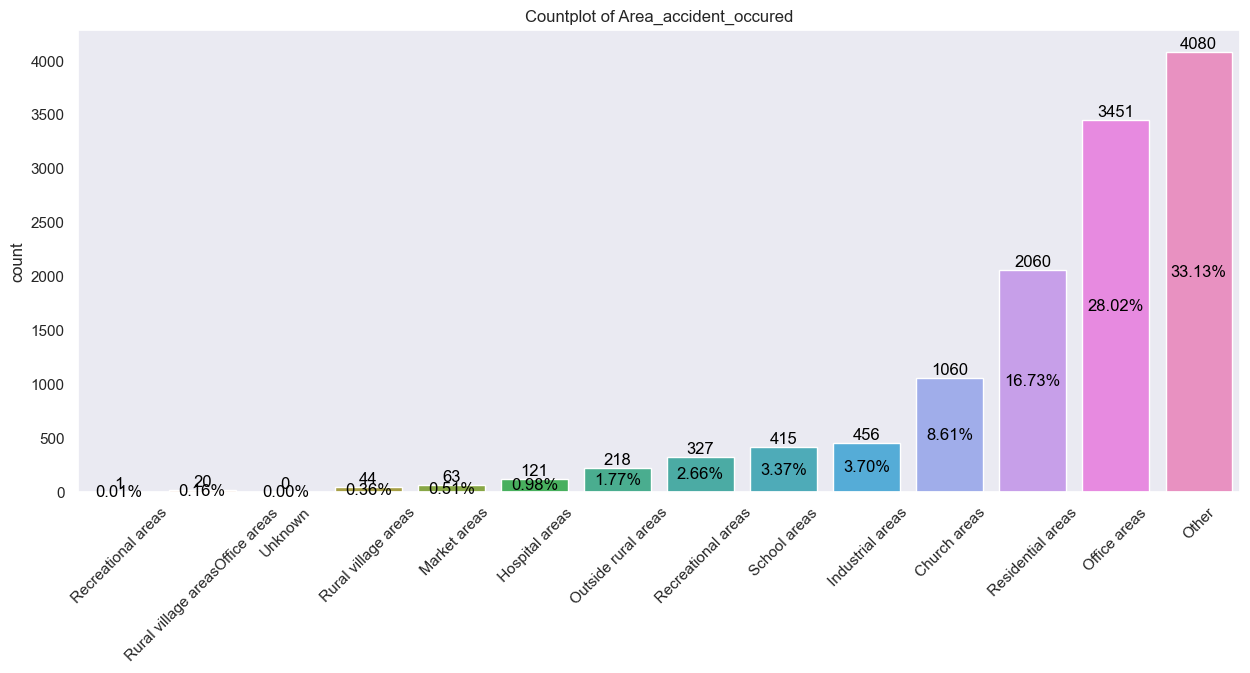

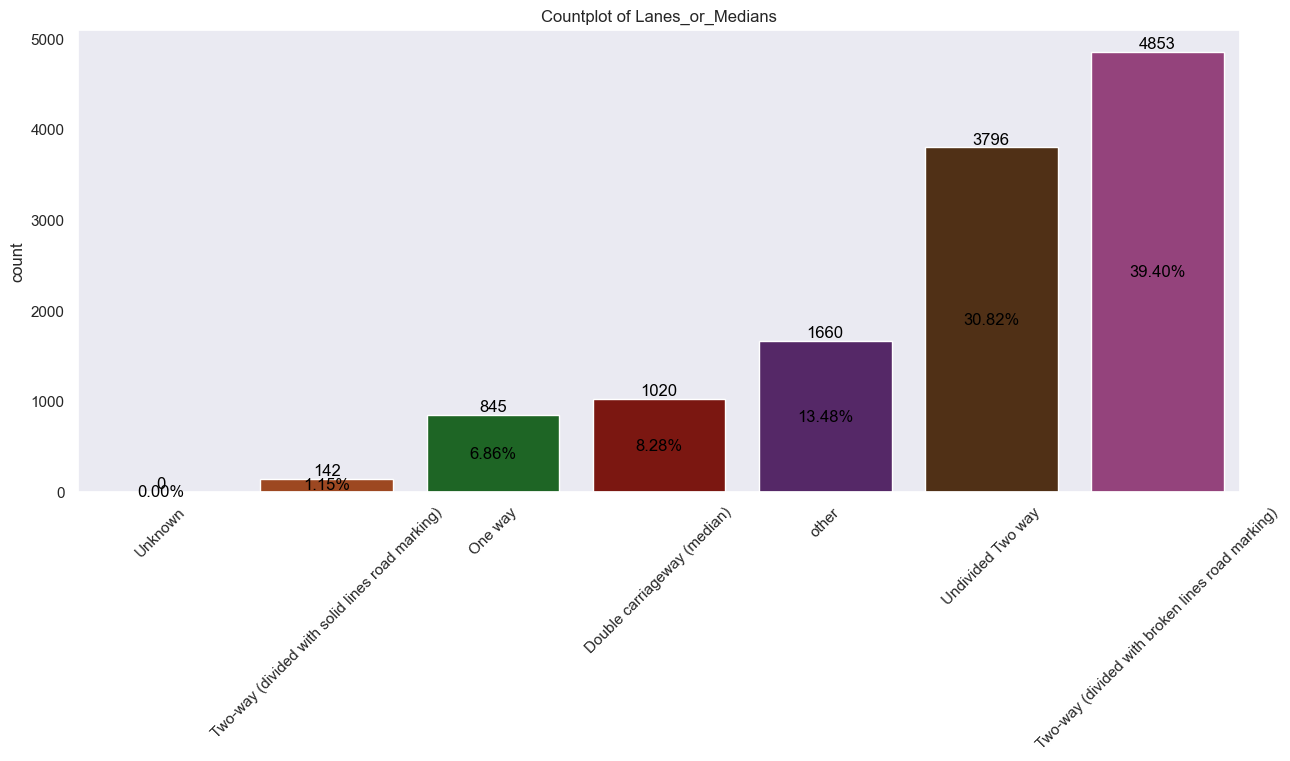

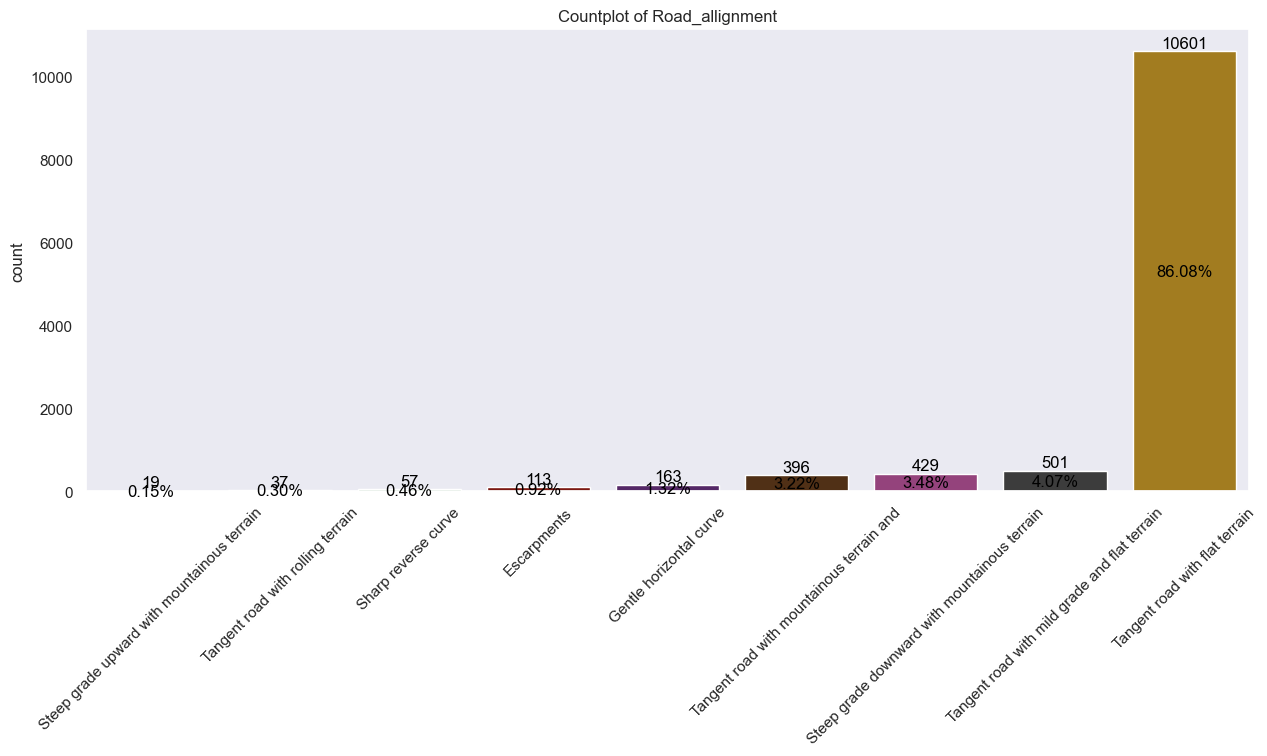

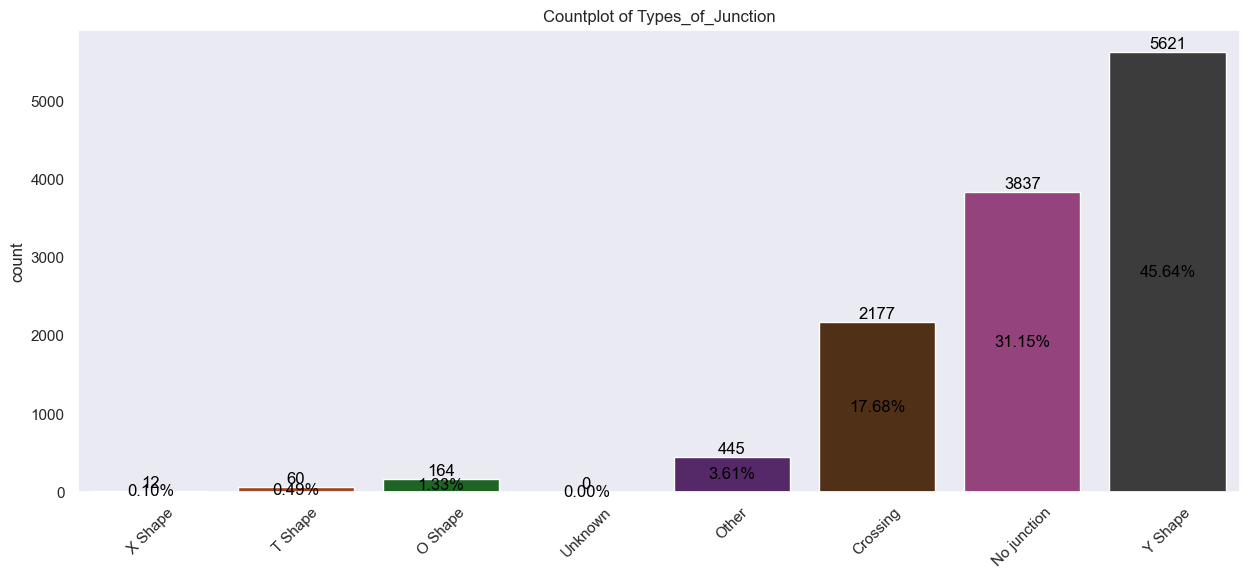

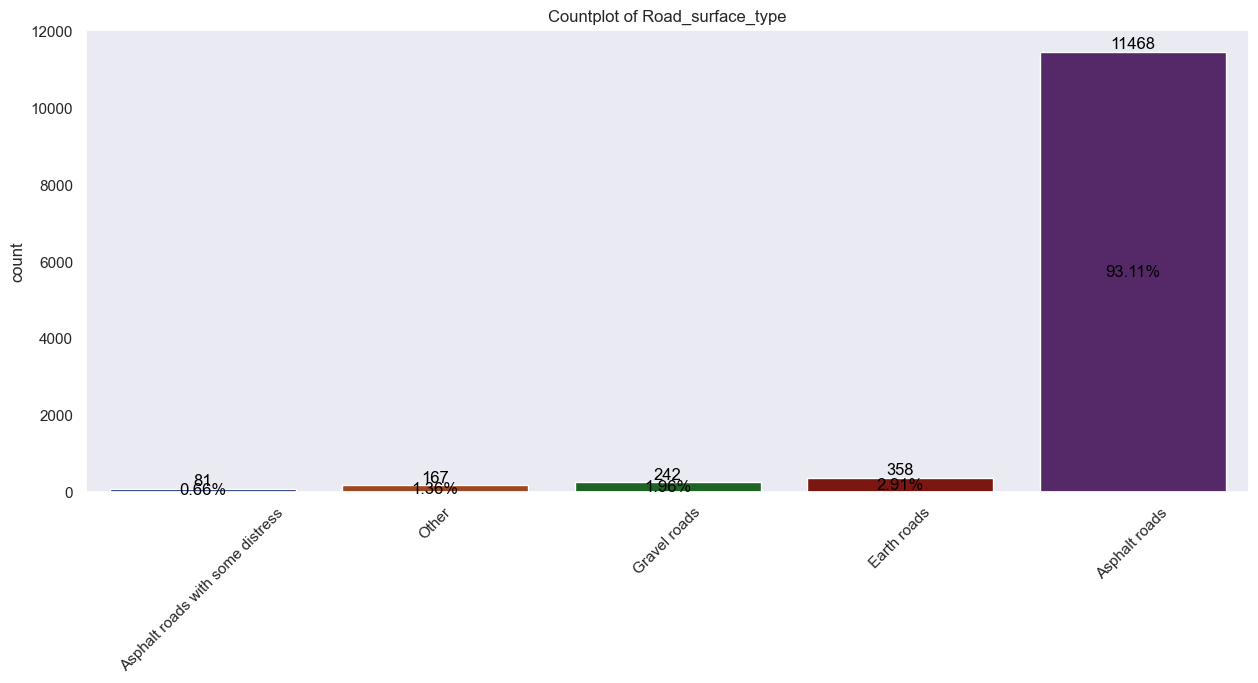

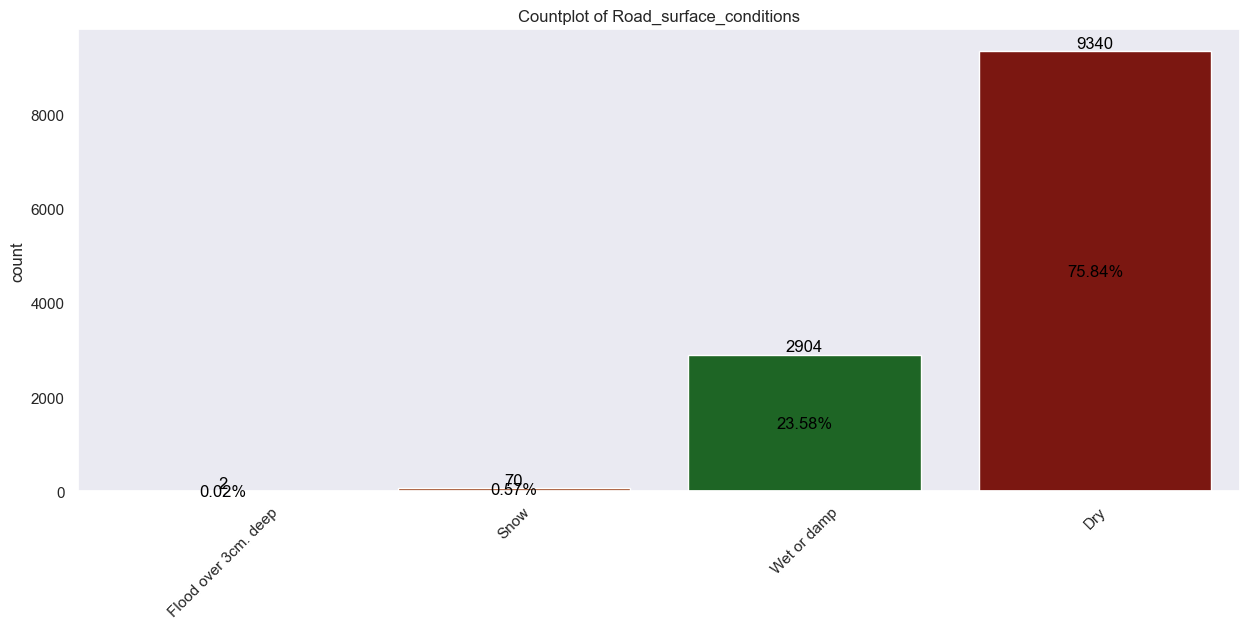

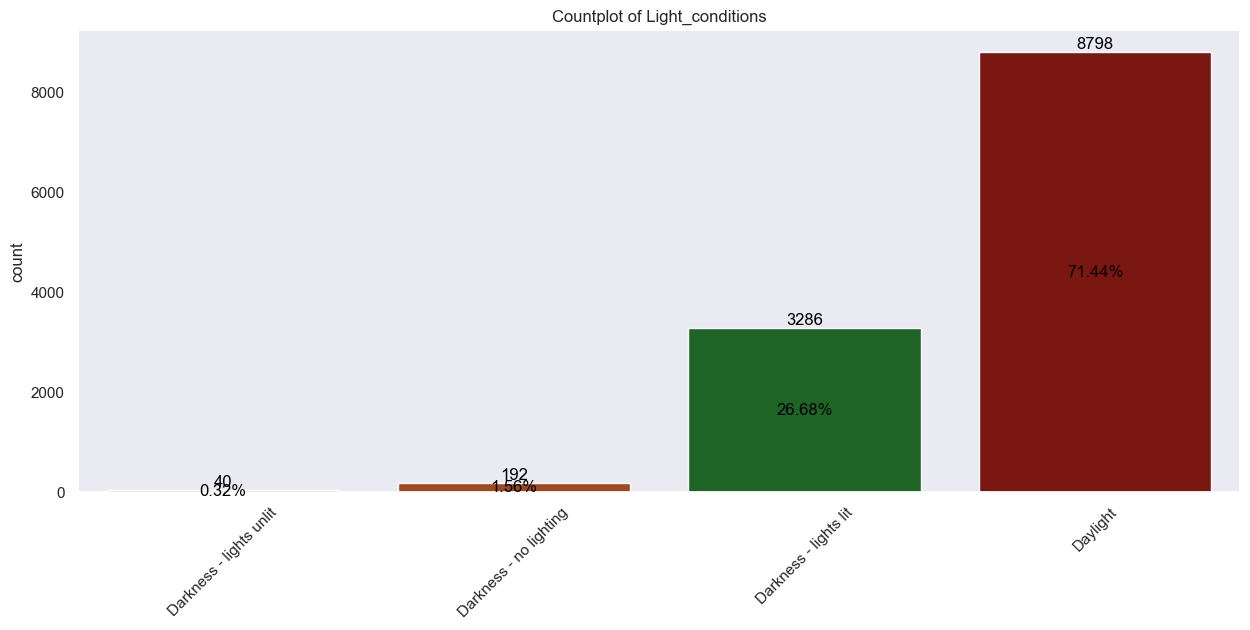

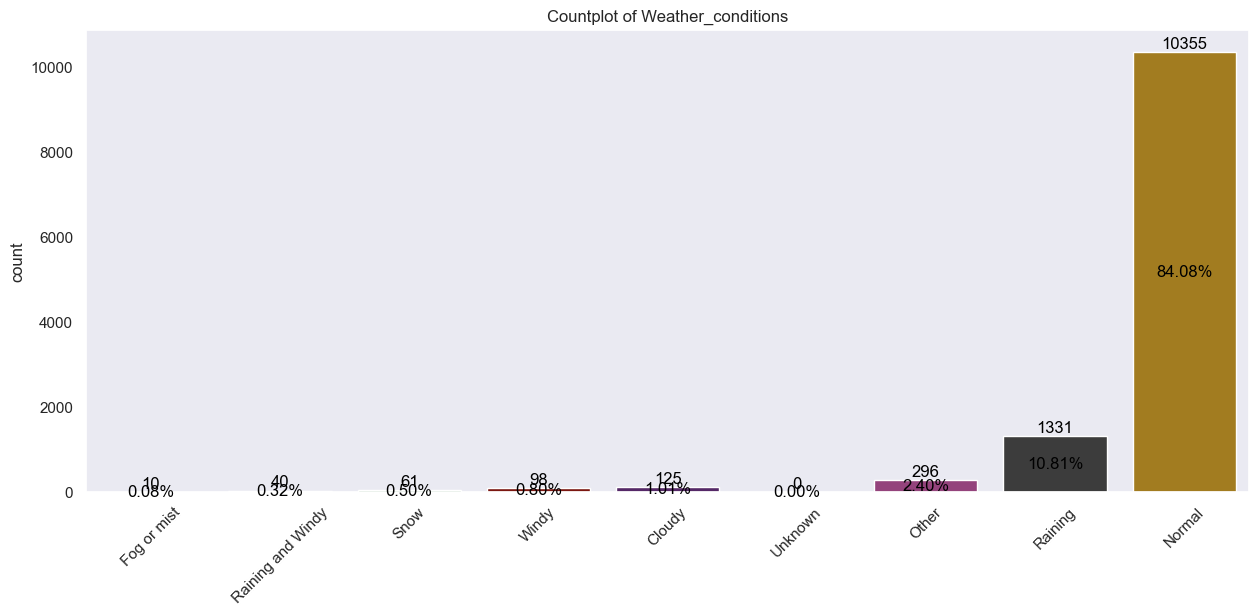

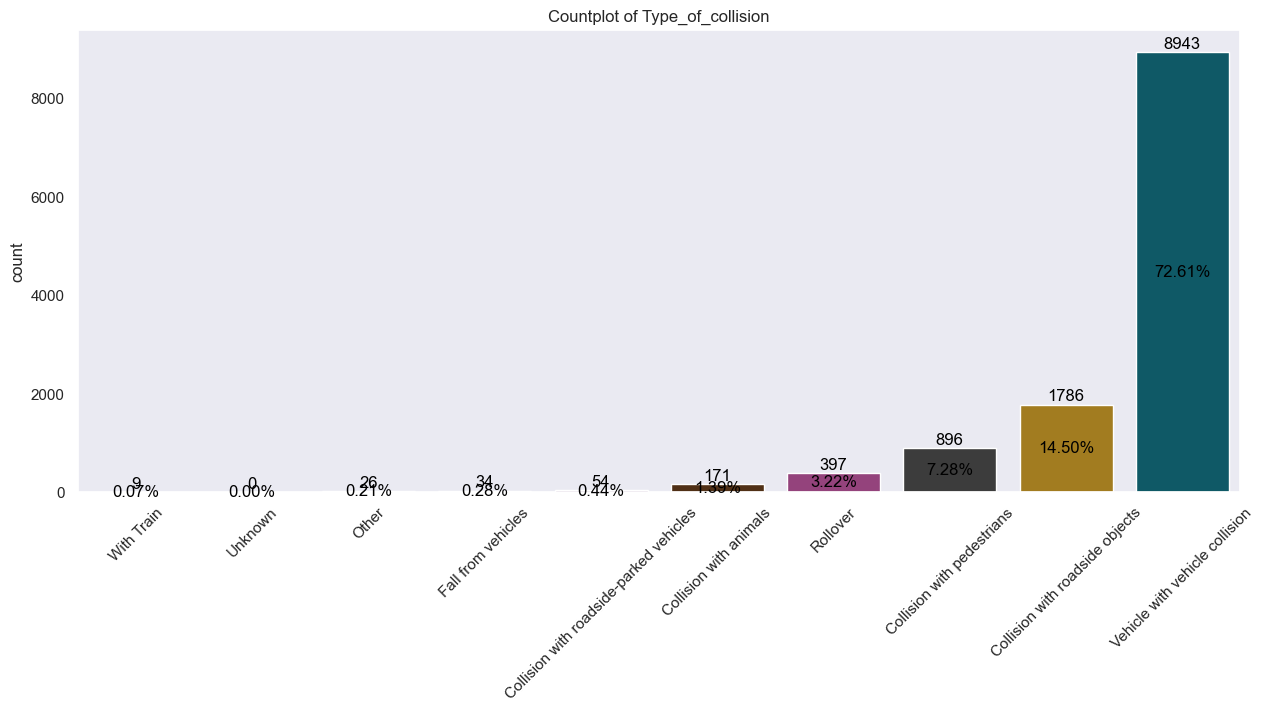

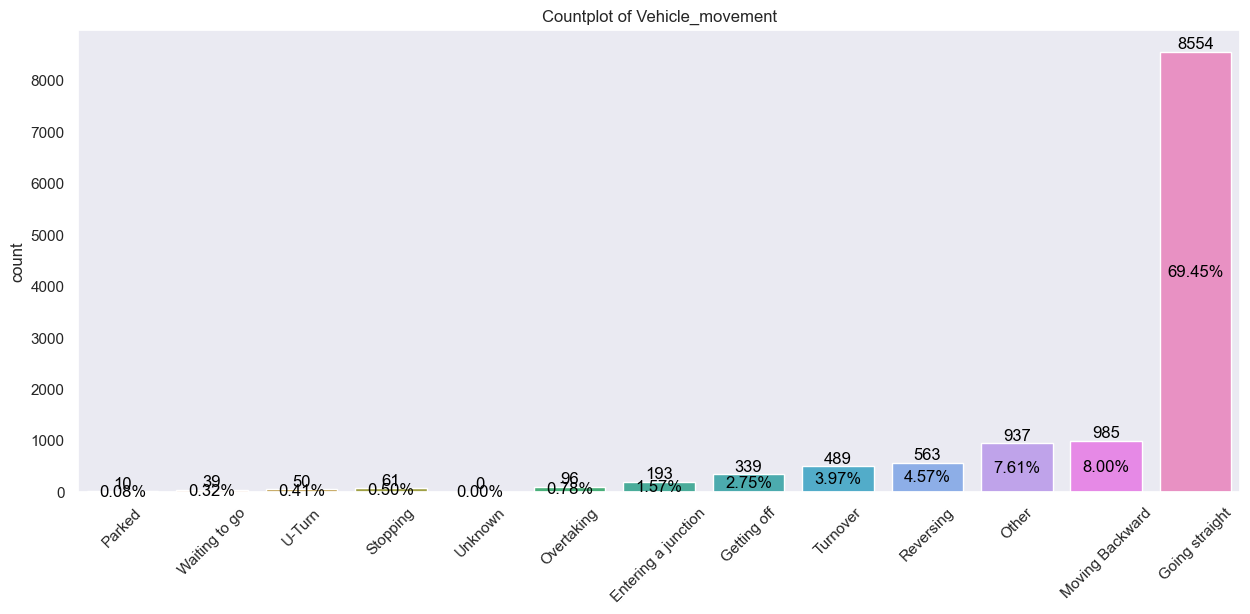

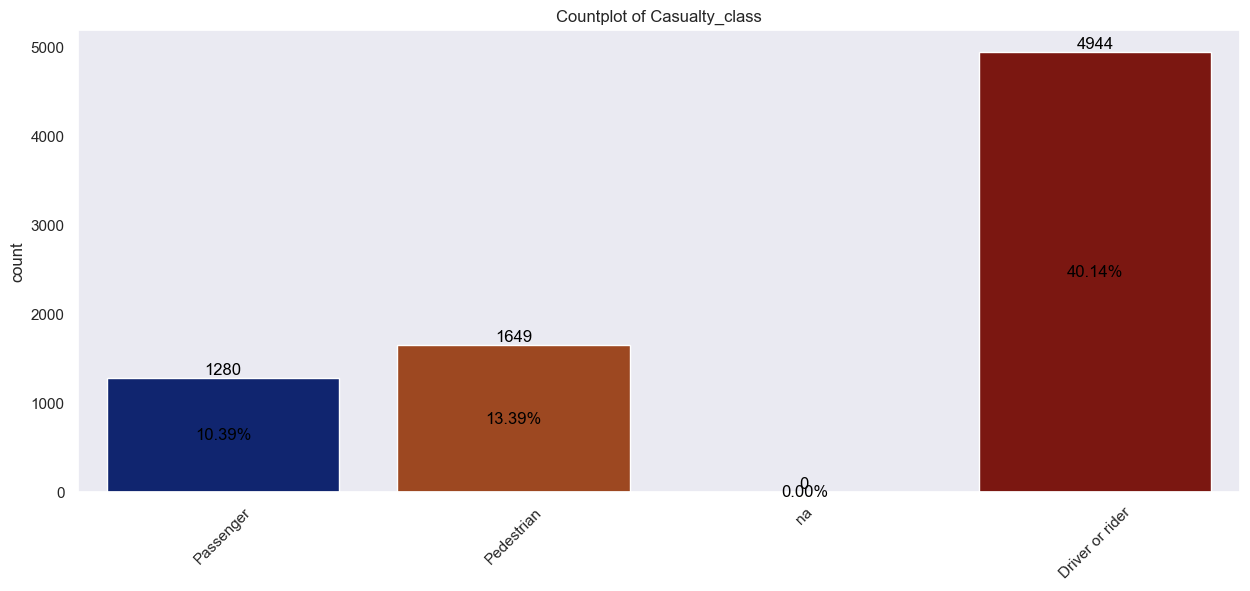

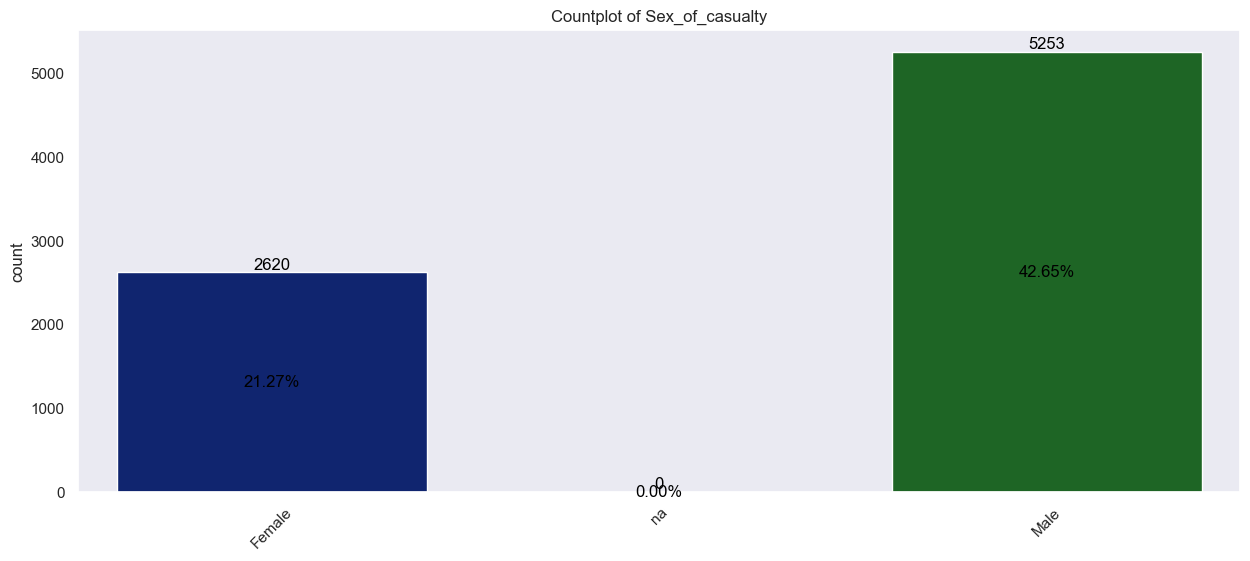

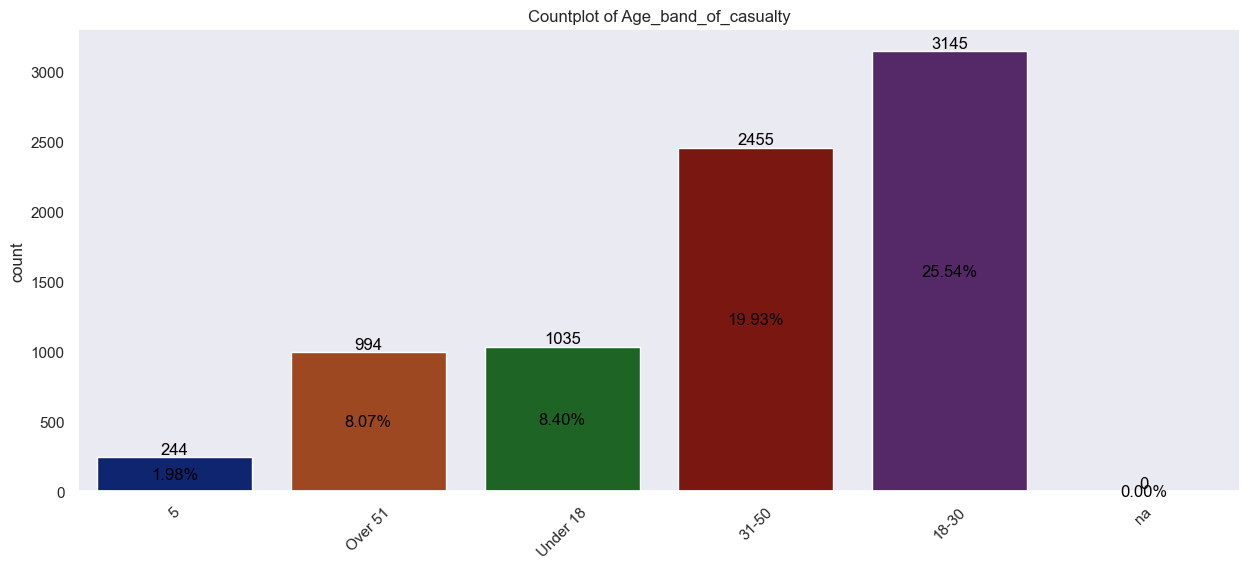

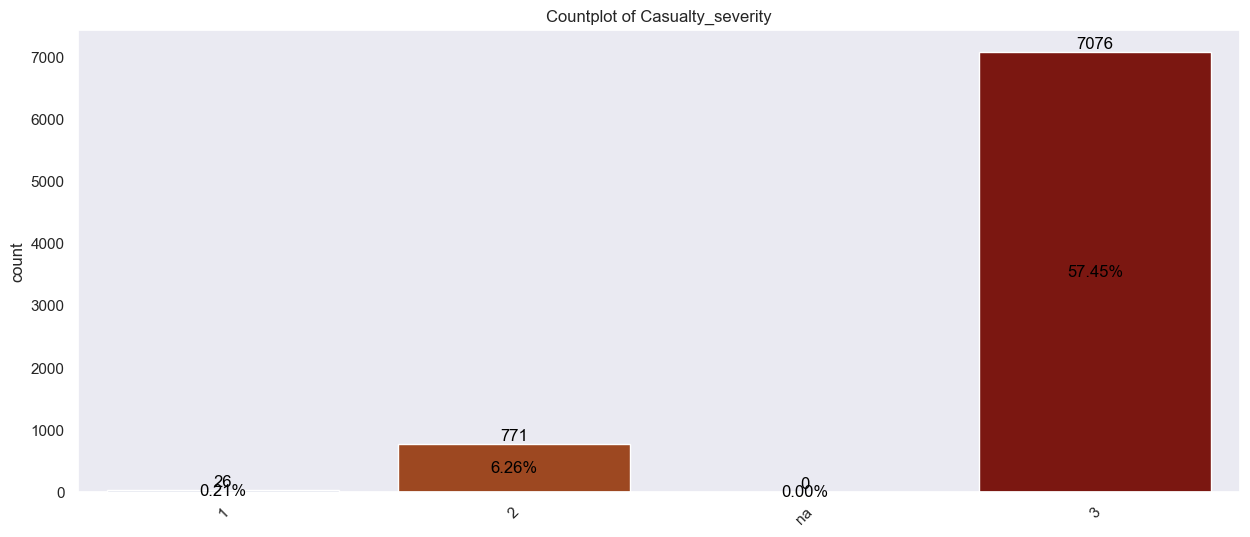

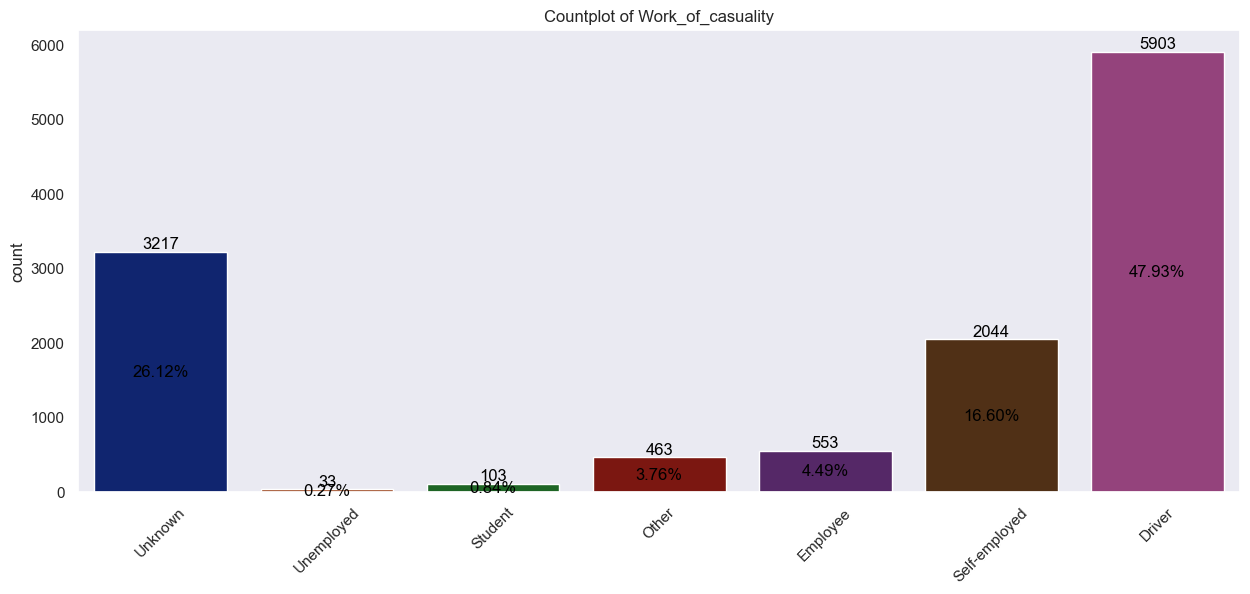

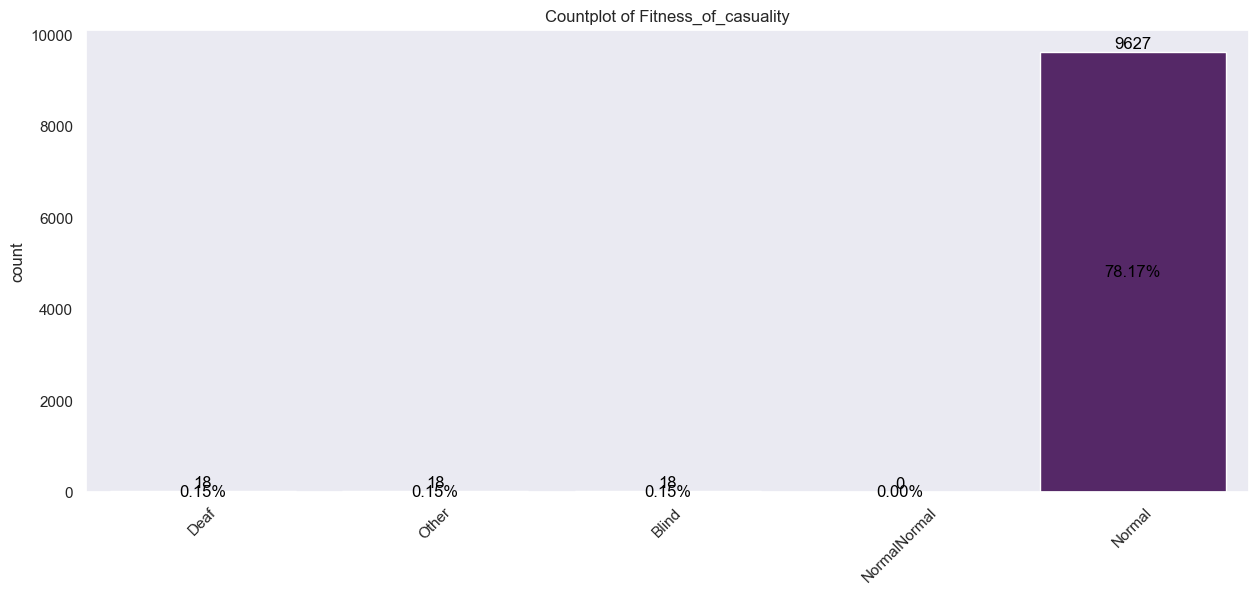

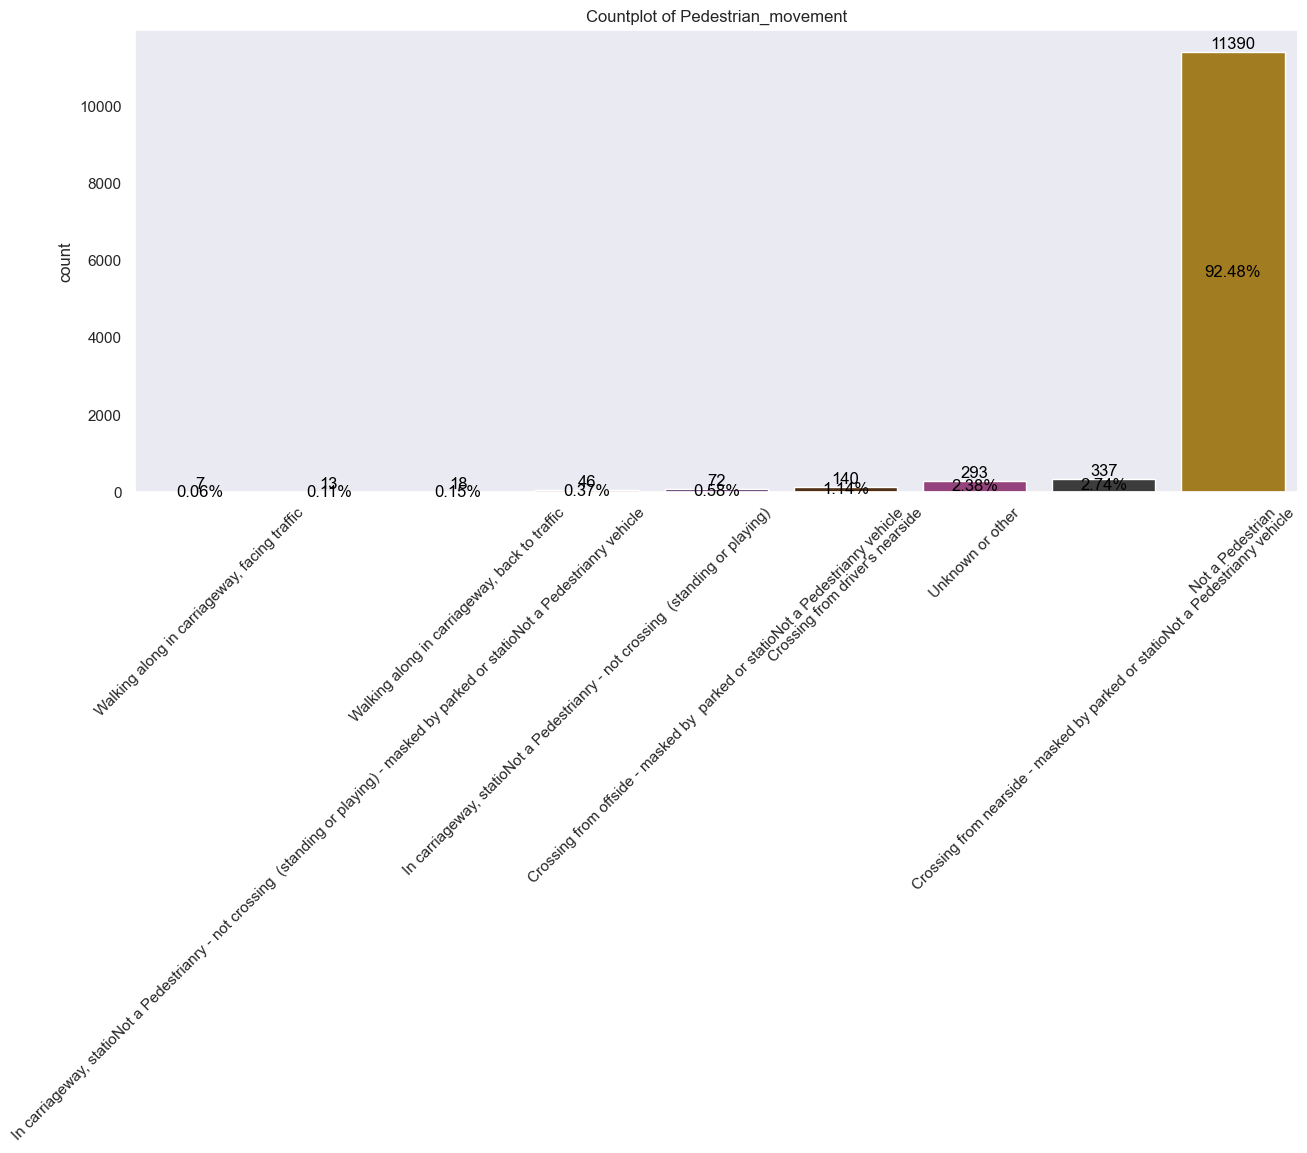

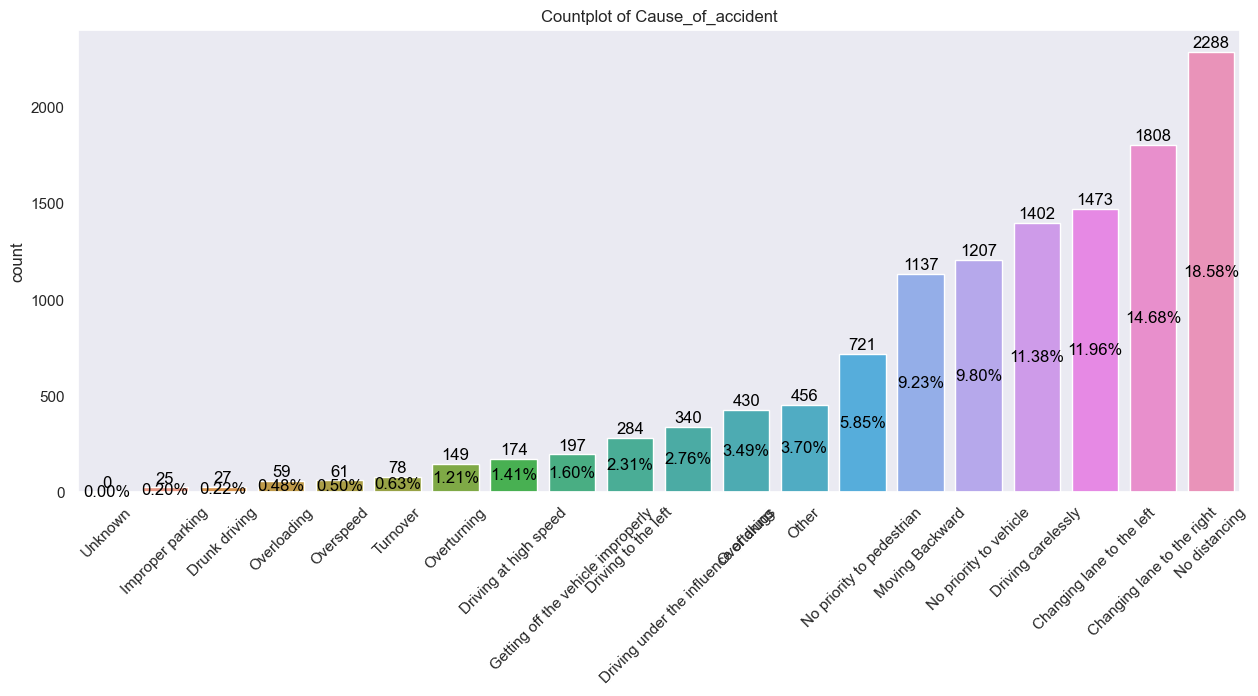

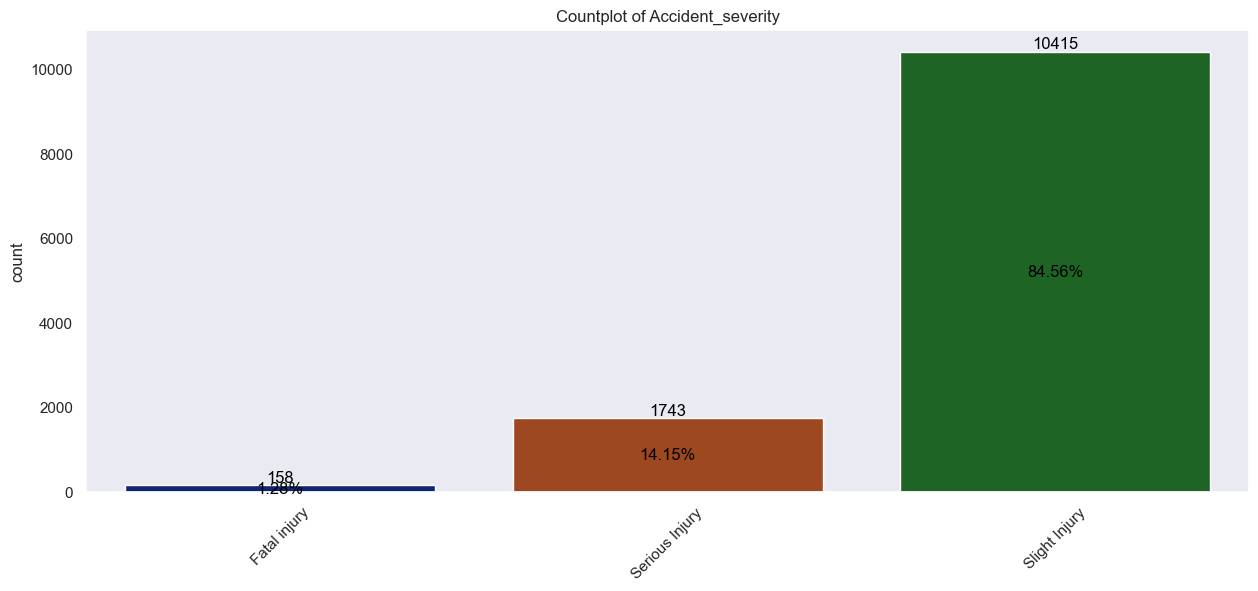

In [32]:
plot_categorical_countplots(df_toimpute, unique_value_limit=20)

### Encoding categorical variables



In [33]:
df_toencode = df_toimpute.copy(deep=True)

In [34]:
# Assuming 'Accident_severity' is your target variable and you don't want to one-hot encode it
target_variable = df_toencode['Accident_severity']  # Extract the target variable

df_toencode['Hour'] = df_toencode['Hour'].astype(str)

df_encoded = pd.get_dummies(df_toencode.drop('Accident_severity', axis=1))  # One-hot encode all other columns

df_encoded = df_encoded.astype(int)

# Combine the one-hot encoded DataFrame with the target variable
df_encoded['Accident_severity'] = target_variable

df_encoded.head()

Number_of_vehicles_involved  Number_of_casualties  Day_of_week_Friday  \
0                            2                     2                   0   
1                            2                     2                   0   
2                            2                     2                   0   
3                            2                     2                   0   
4                            2                     2                   0   

   Day_of_week_Monday  Day_of_week_Saturday  Day_of_week_Sunday  \
0                   1                     0                   0   
1                   1                     0                   0   
2                   1                     0                   0   
3                   0                     0                   1   
4                   0                     0                   1   

   Day_of_week_Thursday  Day_of_week_Tuesday  Day_of_week_Wednesday  \
0                     0                    0                      0   
1                     0                    0                      0   
2                     0                    0                      0   
3                     0                    0                      0   
4                     0                    0                      0   

   Age_band_of_driver_18-30  Age_band_of_driver_31-50  \
0                         1                         0   
1                         0                         1   
2                         1                         0   
3                         1                         0   
4                         1                         0   

   Age_band_of_driver_Over 51  Age_band_of_driver_Under 18  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   Age_band_of_driver_Unknown  Sex_of_driver_Female  Sex_of_driver_Male  \
0                           0                     0                   1   
1                           0                     0                   1   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   

   Educational_level_Above high school  Educational_level_Elementary school  \
0                                    1                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   Educational_level_High school  Educational_level_Illiterate  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   Educational_level_Junior high school  Educational_level_Writing & reading  \
0                                     0                                    0   
1                                     1                                    0   
2                                     1                                    0   
3                                     1                                    0   
4                                     1                                    0   

   Vehicle_driver_relation_Employee  Vehicle_driver_relation_Other  \
0                                 1                              0   
1                                 1                     

### Imbalanced data treatment

In [35]:
df_tobalance = df_encoded.copy(deep=True)

In [36]:

X = df_tobalance.drop('Accident_severity', axis=1)
y = df_tobalance['Accident_severity']

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Models

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

### Logistic regression


In [40]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8352890975037337
F1 Score: 0.8296127280820671
Confusion Matrix:
 [[2653  429   44]
 [ 506 2084  554]
 [   4    7 3093]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.84      0.85      0.84      3126
Serious Injury       0.83      0.66      0.74      3144
 Slight Injury       0.84      1.00      0.91      3104

      accuracy                           0.84      9374
     macro avg       0.83      0.84      0.83      9374
  weighted avg       0.83      0.84      0.83      9374



### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_rf_pred = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_rf_pred)
f1_rf = f1_score(y_test, y_rf_pred, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
class_report_rf = classification_report(y_test, y_rf_pred)

print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Accuracy: 0.9535950501386815
F1 Score: 0.9536353299984234
Confusion Matrix:
 [[3103    2   21]
 [   2 2809  333]
 [   0   77 3027]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       1.00      0.99      1.00      3126
Serious Injury       0.97      0.89      0.93      3144
 Slight Injury       0.90      0.98      0.93      3104

      accuracy                           0.95      9374
     macro avg       0.96      0.95      0.95      9374
  weighted avg       0.96      0.95      0.95      9374



### XGBoost

In [43]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [44]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)

# Make predictions
y_xgb_pred_encoded = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test_encoded, y_xgb_pred_encoded)
f1_xgb = f1_score(y_test_encoded, y_xgb_pred_encoded, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_xgb_pred_encoded)
class_report_xgb = classification_report(y_test_encoded, y_xgb_pred_encoded)

# Print the metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"F1 Score: {f1_xgb}")
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)


Accuracy: 0.9338596116919138
F1 Score: 0.9333478534273127
Confusion Matrix:
 [[3099    4   23]
 [  47 2610  487]
 [   2   57 3045]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3126
           1       0.98      0.83      0.90      3144
           2       0.86      0.98      0.91      3104

    accuracy                           0.93      9374
   macro avg       0.94      0.93      0.93      9374
weighted avg       0.94      0.93      0.93      9374



### K-Nearest Neighbors (KNN) classifier 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

X_test = np.array(X_test)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of K

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_knn_pred = knn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_knn_pred)
f1_knn = f1_score(y_test, y_knn_pred, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_knn_pred)
class_report_knn = classification_report(y_test, y_knn_pred)

# Print the metrics
print(f"Accuracy: {accuracy_knn}")
print(f"F1 Score: {f1_knn}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)


Accuracy: 0.6901002773629187
F1 Score: 0.6029671074978148
Confusion Matrix:
 [[3126    0    0]
 [ 109 3031    4]
 [ 597 2195  312]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.82      1.00      0.90      3126
Serious Injury       0.58      0.96      0.72      3144
 Slight Injury       0.99      0.10      0.18      3104

      accuracy                           0.69      9374
     macro avg       0.79      0.69      0.60      9374
  weighted avg       0.79      0.69      0.60      9374



### Support Vector Machine (SVM)

In [46]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C value

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_svm_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_svm_pred)
f1_svm = f1_score(y_test, y_svm_pred, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_svm_pred)
class_report_svm = classification_report(y_test, y_svm_pred)

# Print the metrics
print(f"Accuracy: {accuracy_svm}")
print(f"F1 Score: {f1_svm}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", class_report_svm)


Accuracy: 0.8347557072754427
F1 Score: 0.8290724063083439
Confusion Matrix:
 [[2632  448   46]
 [ 496 2089  559]
 [   0    0 3104]]
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.84      0.84      0.84      3126
Serious Injury       0.82      0.66      0.74      3144
 Slight Injury       0.84      1.00      0.91      3104

      accuracy                           0.83      9374
     macro avg       0.83      0.84      0.83      9374
  weighted avg       0.83      0.83      0.83      9374



**Random Forest Classifier has the Highest Accuracy of 95.36% and Highest F1 score of approximately 0.954.**

### Feature Importance in Random Forest model

In [47]:
importances = rf_classifier.feature_importances_

# Calculate the total importance sum
total_importance = np.sum(importances)

# Sort feature importances in descending order and get corresponding feature names
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns  # Replace with your feature names or labels

# Print the feature ranking with percentages
print("Feature ranking:")
for f in range(len(indices)):
    importance_percentage = (importances[indices[f]] / total_importance) * 100
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importance_percentage:.2f}%)")


Feature ranking:
1. Feature 'Number_of_casualties' (5.52%)
2. Feature 'Number_of_vehicles_involved' (3.78%)
3. Feature 'Light_conditions_Daylight' (2.19%)
4. Feature 'Types_of_Junction_Crossing' (1.60%)
5. Feature 'Lanes_or_Medians_Two-way (divided with broken lines road marking)' (1.58%)
6. Feature 'Driving_experience_5-10yr' (1.50%)
7. Feature 'Type_of_collision_Vehicle with vehicle collision' (1.47%)
8. Feature 'Defect_of_vehicle_Unknown' (1.45%)
9. Feature 'Service_year_of_vehicle_Unknown' (1.40%)
10. Feature 'Defect_of_vehicle_No defect' (1.39%)
11. Feature 'Vehicle_movement_Going straight' (1.39%)
12. Feature 'Age_band_of_driver_31-50' (1.37%)
13. Feature 'Age_band_of_driver_18-30' (1.36%)
14. Feature 'Type_of_vehicle_Automobile' (1.34%)
15. Feature 'Educational_level_Junior high school' (1.33%)
16. Feature 'Area_accident_occured_Other' (1.32%)
17. Feature 'Types_of_Junction_Y Shape' (1.32%)
18. Feature 'Work_of_casuality_Driver' (1.32%)
19. Feature 'Area_accident_occured_Office 

## Hyper Parameter Tuning
